<img src="https://logosmarken.com/wp-content/uploads/2020/04/Amazon-Logo.png" alt="Beschreibung des Bildes" width="200" height="150">

# Amazon Product Data Analysis 2023 🔥

## I. Introduction

### I.I About Dataset 📖

- This is a Product Dataset scraped from the indian Amazon website in 2023
- Its product data are separated by 142 categories in csv format, along with the full dataset name Amazon-Products.csv.
- Each csv files are consist of 10 columns and each row has products details accordingly


[Here's the link to the dataset](https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset)

 ### I.II Objectives ❔

- What are the most popular product categories and brands? Which categories are niche fields, and where might there be growth opportunities?
- What impact do prices, discounts, and the number of reviews have on the rating?
- At what prices are products offered in various categories and brands?
- What rating get products from various categories and brands?

## II. Read, clean and transform data
### II.I Read data 🕐

In [1]:
import pandas as pd
import numpy as np # linear algebra
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
import matplotlib.ticker as mticker
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import plotly.express as px
import os
import statsmodels.formula.api as smf # linear regression
from scipy import stats
%matplotlib inline

First, we load our data:

In [2]:
# path to the local folder where the CSV files are stored
path ="C:/Datasets/Amazon Product Sales Dataset 2023"

# List of all CSV files in the folder
all_files = os.listdir(path)

# Read data from each CSV file and display it separately
#for filename in all_files:
   # if filename.endswith('.csv'):
        #file_path = os.path.join(path, filename)
        #df = pd.read_csv(file_path)
        
        #print(f"Table from {filename}:")
        #display(df.head())  # Display the entire table
        #print("\n" + "="*40 + "\n")  # Separator line between outputs

# Initialize an empty DataFrame to store combined data
combined_df = pd.DataFrame()

# Read data from each CSV file and combine into the combined_data DataFrame
for filename in all_files:
    if filename.endswith('.csv'):
        file_path = os.path.join(path, filename)
        data = pd.read_csv(file_path, low_memory=False)
        combined_df = pd.concat([combined_df, data], ignore_index=True)

### II. I Understand data

After loading the data, our initial step involves gaining a comprehensive understanding of the combined_df DataFrame. To achieve this, we perform the following actions:

1. **DataFrame Information**: We begin by examining crucial details such as data types and non-null counts using combined_df.info().

2. **Viewing Initial Data**: We display the initial rows of the DataFrame through combined_df.head(), allowing us to get a sense of the dataset's structure and content.

3. **Viewing End Data**: To complete our view, we also showcase the last rows of the DataFrame via combined_df.tail().

4. **Statistical Measures**: Employing combined_df.describe(), we calculate key statistical figures for numerical columns, which provide insights into the data's distribution.

5. **Data Dimensions***: We determine the size of our DataFrame by displaying the count of rows and columns with combined_df.shape.

6. **Handling Missing Values**: Lastly, we identify and quantify any missing values within the DataFrame using combined_df.isna().sum(). This step is critical for addressing data gaps and ensuring data quality.







Let´s begin and get an first overview of the dataset:

In [3]:
# Display main information and figures of the combined_df DataFrame
print("Overview main informations:", '\n')
display(combined_df.info())

Overview main informations: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   name            1103170 non-null  object 
 1   main_category   1103170 non-null  object 
 2   sub_category    1103170 non-null  object 
 3   image           1103170 non-null  object 
 4   link            1103170 non-null  object 
 5   ratings         751582 non-null   object 
 6   no_of_ratings   751582 non-null   object 
 7   discount_price  980844 non-null   object 
 8   actual_price    1067544 non-null  object 
 9   Unnamed: 0      551585 non-null   float64
dtypes: float64(1), object(9)
memory usage: 84.2+ MB


None



- **Number of Entries**: As you see, the dataset contains a total of 1,103,170 entries (rows).
- **Columns**: There are ten columns in the dataset, each with a corresponding name.
- **Data Types**: All columns in the dataset have the data type "object." This suggests that these columns may contain a mixture of data types, including text (strings) and potentially numerical values represented as strings.
- **Non-Null Counts**: The "Non-Null Count" column indicates the number of non-missing (non-null) values in each column. For example, the columns ratings, no_of_ratings, discount_price, and actual_price have missing values because their non-null counts are less than the total number of entries.

Overall, this overview provides a snapshot of the dataset's structure, including the number of entries, column names, data types, and the presence of missing values in certain columns. To proceed with data analysis or visualization, it's essential to address missing values and potentially convert columns with numerical data stored as strings to their appropriate numerical data types.


Following that, let's examine both the initial and concluding rows of the DataFrame to gain insight into any additional tasks that may be required.

In [4]:
# Show first rows of the combined_df DataFrame
print('\n', 'First rows:')
display(combined_df.head())

# Show last rows of the combined_df DataFrame
print('\n', 'Last rows:')
display(combined_df.tail())


 First rows:


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,Unnamed: 0
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990",NaN
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990",NaN
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990",NaN
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990",NaN
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790",NaN



 Last rows:


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,Unnamed: 0
1103165,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,https://m.media-amazon.com/images/I/71tHAR9pIY...,https://www.amazon.in/Adidas-Regular-Mens-Trac...,3.2,9,"₹3,449","₹4,599",NaN
1103166,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41pKrMZ5lQ...,https://www.amazon.in/Redwolf-Noice-Smort-Cott...,2.0,2,"₹1,199","₹1,999",NaN
1103167,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41n9u+zNSc...,https://www.amazon.in/Redwolf-Schrute-Farms-Ho...,4.0,1,"₹1,199","₹1,999",NaN
1103168,Puma Men Shorts,sports & fitness,Yoga,https://m.media-amazon.com/images/I/51LoWv5JDt...,https://www.amazon.in/Puma-Woven-Short-5208526...,4.4,37,NaN,NaN,NaN
1103169,Mothercare Printed Cotton Elastane Girls Infan...,sports & fitness,Yoga,https://m.media-amazon.com/images/I/814X-sI3DB...,https://www.amazon.in/Mothercare-Carrot-Regula...,4.6,5,"₹1,039","₹1,299",NaN



As a result, it can be observed that the brand name does not appear to be listed in a separate column, and the price columns contain a currency symbol (INR). We take care of that later.

Let´s also take a closer on the missing values:

In [5]:
# Show missing values in the combined_df DataFrame
print('\n', 'Missing values:')
display(combined_df.isna().sum())


 Missing values:


name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           351588
no_of_ratings     351588
discount_price    122326
actual_price       35626
Unnamed: 0        551585
dtype: int64

The summary of missing values indicates that the "name," "main_category," "sub_category," "image," and "link" columns have no missing values. However, there are a lot of missing values in the columns ratings, no_of_ratings_discount_price and Unnamed: 0.

These missing values will need to be addressed, either by imputing data where possible or by making decisions about how to handle them during the analysis. To handle missing values in your dataset, we have several options, depending on the nature of our data and our analysis goals.

### II. II Clean and transform data
#### Removing column "Unnamed: 0" 

The "Unnamed: 0" column typically represents an index that was present in the DataFrame before it was exported to a CSV file or underwent other data manipulation. It often contains values that correspond to the original row indices of the DataFrame. However, this column doesn't usually provide any meaningful information and can be confusing as it's essentially a duplicate of the row index.

It doesn't add any additional information and can make the data view less clear. We remove them using the following code.

In [6]:
# Remove unwanted columns
combined_df.drop(columns=['Unnamed: 0'], inplace=True)
display(combined_df.head())
display(combined_df.tail())
print(combined_df.shape)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
1103165,Adidas Regular Fit Men's Track Tops,sports & fitness,Yoga,https://m.media-amazon.com/images/I/71tHAR9pIY...,https://www.amazon.in/Adidas-Regular-Mens-Trac...,3.2,9,"₹3,449","₹4,599"
1103166,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41pKrMZ5lQ...,https://www.amazon.in/Redwolf-Noice-Smort-Cott...,2.0,2,"₹1,199","₹1,999"
1103167,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness,Yoga,https://m.media-amazon.com/images/I/41n9u+zNSc...,https://www.amazon.in/Redwolf-Schrute-Farms-Ho...,4.0,1,"₹1,199","₹1,999"
1103168,Puma Men Shorts,sports & fitness,Yoga,https://m.media-amazon.com/images/I/51LoWv5JDt...,https://www.amazon.in/Puma-Woven-Short-5208526...,4.4,37,NaN,NaN
1103169,Mothercare Printed Cotton Elastane Girls Infan...,sports & fitness,Yoga,https://m.media-amazon.com/images/I/814X-sI3DB...,https://www.amazon.in/Mothercare-Carrot-Regula...,4.6,5,"₹1,039","₹1,299"


(1103170, 9)


#### Removing duplicates
In the next step we delete all duplicate rows, to ensure that each row in the DataFrame represents unique and distinct data points.

In [7]:
# Drop duplicates
combined_df.drop_duplicates(inplace=True)

# Show columns and rows afterwards
print(combined_df.shape)

(569895, 9)


As we see, the dataframe now only has 569.895 rows left.

#### Removing currency symbol

In [8]:
# List of columns that should be checked
float_columns = ['ratings', 'no_of_ratings', 'discount_price', 'actual_price']

# Remove '₹' currency symbol and replace thousand separators
for col in float_columns:
    combined_df[col] = combined_df[col].str.replace('₹', '', regex=False)
    combined_df[col] = combined_df[col].str.replace(',', '', regex=False)

# Display updated values in the specified columns
print(f"Updated values:")
display(combined_df.head())

Updated values:


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255,32999,58990
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948,46490,75990
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206,34490,61990
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,37990,68990
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,34490,67790


#### Get an overview of missing values

In [9]:
# Print missing values for each column
print("Missing values in each column:")
print(combined_df.isna().sum())
print("Count of columns and rows:")
print(combined_df.shape)

Missing values in each column:
name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           194104
no_of_ratings     175857
discount_price     62194
actual_price       18074
dtype: int64
Count of columns and rows:
(569895, 9)


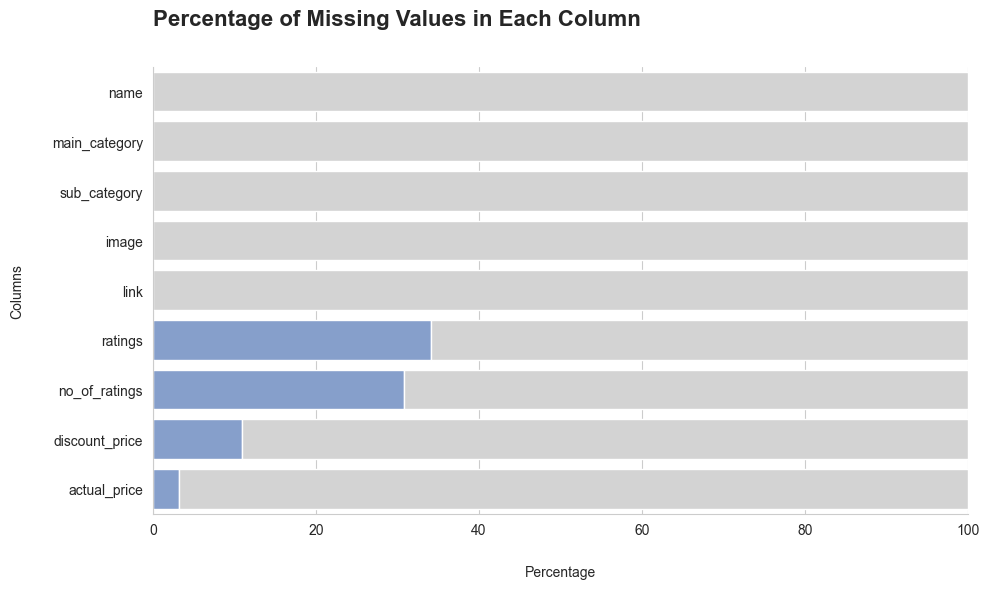

In [10]:
# Calculate the percentage of missing values in each column
missing_percentage = (combined_df.isnull().sum() / len(combined_df)) * 100

# Calculate the percentage of available values in each column
available_percentage = 100 - missing_percentage

# Create a horizontal 100% stacked bar chart
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x=missing_percentage.values, y=missing_percentage.index, color='#6495ED', saturation=0.5)
ax = sns.barplot(x=available_percentage.values, y=missing_percentage.index, color='lightgray', saturation=0.5, left=missing_percentage.values)

# Set plot title and labels
plt.title("Percentage of Missing Values in Each Column", loc='left', pad=30, fontweight='bold', fontsize=16)
plt.xlabel("Percentage", labelpad=20)
plt.ylabel("Columns", labelpad=20)

# Set x-axis limits to 0-100
plt.xlim(0, 100)

# Remove top and right spines
sns.despine(top=True, right=True)

# Show the plot
plt.tight_layout()
plt.show()

- **Ratings:** This column has 194,104 missing values, implying that a significant portion of products has no ratings provided.
- **Number of Ratings:** This column has 175,857 missing values, indicating that there is no count of ratings available for many products.
- **Discount Price:**" This column contains 62,194 missing values, suggesting that not every product has a specified discount price.
- **Actual Price:** This column has 18,074 missing values, meaning that there is no listed original price available for some products.

It is important to note that the presence of missing values in the "ratings," "no_of_ratings," "discount_price," and "actual_price" columns may indicate that not all products have been reviewed or have discounts. This could potentially impact future analyses, and consideration should be given to how missing values will be handled if they play a role in the analysis.

#### Replace missing values in ratings and number of ratings

1. **Definining relevant columns:** We start by defining a list of relevant columns named "relevant_columns." These columns include 'ratings,' 'no_of_ratings,' 'actual_price,' and 'discount_price.' These columns are considered relevant for our analysis, likely because they contain important information about the products.

2. **Filtering Rows with Missing Values**: We then filter rows from the DataFrame where at least three missing values are present in the relevant columns. This is achieved using the isna().sum(axis=1) method, which calculates the number of missing values in each row within the specified relevant columns. Rows with three or more missing values in these columns are retained, while others are filtered out.

3. **Counting Filtered Rows**: We calculate the number of rows that meet the criteria of having at least three missing values in the relevant columns and store this count in the variable "num_rows_with_missing_values."

4. **Displaying Filtered Rows**: Finally, we display a subset of the rows that meet the criteria using the head() and tail() functions. This allows us to examine the filtered rows and better understand which data points are missing and why.

In [11]:
# Define the list of relevant columns
relevant_columns = ['ratings', 'no_of_ratings', 'actual_price', 'discount_price']

# Filter rows with at least 3 missing values in relevant columns
rows_with_missing_values = combined_df[combined_df[relevant_columns].isna().sum(axis=1) >= 3]

# Count the number of rows
num_rows_with_missing_values = rows_with_missing_values.shape[0]
print(f"Number of rows with at least 3 missing values in relevant columns: {num_rows_with_missing_values}")

# Display the filtered rows
display(rows_with_missing_values.head())
display(rows_with_missing_values.tail())

Number of rows with at least 3 missing values in relevant columns: 26321


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
170,Blue Star 2 Tr 3 Star Fixed Speed Split AC (Co...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/21WQrs98j1...,https://www.amazon.in/Blue-Star-Fixed-Copper-F...,NaN,NaN,NaN,NaN
212,"FANCISUN Portable Air Conditioner,Personal Air...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/51xoVYg8ba...,https://www.amazon.in/FANCISUN-Portable-Condit...,NaN,NaN,NaN,8980
228,"Voltas Adjustable Inverter AC, 1.5 Ton, 3 Star...",appliances,Air Conditioners,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Voltas-Adjustable-Invert...,NaN,NaN,NaN,NaN
238,Carrier Emperia CXI Wifi 1.5 Ton 5 Star Invert...,appliances,Air Conditioners,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Carrier-Emperia-CXI-Cond...,NaN,NaN,NaN,NaN
262,OGeneral 1.8 Ton 4 Star Inverter Split AC (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/OGeneral-Inverter-Copper...,NaN,NaN,NaN,NaN


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
1053143,global desi Women Top,stores,The Designer Boutique,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/global-desi-Regular-SS19...,NaN,4,NaN,NaN
1053144,AND Women's Synthetic Mini A-Line Dress,stores,The Designer Boutique,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Synthetic-line-EC192AF00...,NaN,6,NaN,NaN
1053147,global desi Rayon a-line Dress,stores,The Designer Boutique,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/global-desi-Womens-Embro...,NaN,1,NaN,NaN
1053400,ALCiS Men Charcoal Polo Collar T-Shirt,stores,The Designer Boutique,https://m.media-amazon.com/images/I/61MWLJnKW6...,https://www.amazon.in/ALCiS-Charcoal-Polo-Coll...,NaN,1,NaN,NaN
1053563,LABEL SHIPRA BOHARA Women's Printed Rayon Kurt...,stores,The Designer Boutique,https://m.media-amazon.com/images/I/71m2OY27mE...,https://www.amazon.in/LABEL-SHIPRA-BOHARA-Prin...,NaN,2,NaN,NaN


By filtering out rows with at least three missing values in the specified relevant columns, we are likely aiming to clean the dataset and ensure that the data used for analysis is reliable and informative. Rows with multiple missing values may not provide meaningful insights, and removing them, improves the quality of subsequent analyses.

In [12]:
# Define the list of relevant columns
relevant_columns = ['ratings', 'no_of_ratings', 'actual_price', 'discount_price']

# Count the number of NaN values in each row for the relevant columns
combined_df['nan_count'] = combined_df[relevant_columns].isna().sum(axis=1)

# Filter rows where at least 3 of the specified columns have NaN values
combined_df = combined_df[combined_df['nan_count'] < 3]

# Drop the 'nan_count' column as it's no longer needed
combined_df = combined_df.drop(columns=['nan_count'])

print(combined_df.shape)

(543574, 9)


In [13]:
# Print missing values for each column
print("Missing values in each column:")
print(combined_df.isna().sum())
print("Count of columns and rows:")
print(combined_df.shape)

Missing values in each column:
name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           167783
no_of_ratings     149790
discount_price     35873
actual_price        6761
dtype: int64
Count of columns and rows:
(543574, 9)


In [14]:
# Identify the number of rows that meet the condition
filtered_rows = combined_df[(combined_df['no_of_ratings'].isna()) & (combined_df['ratings'].isna())]
num_rows_matching_condition = len(filtered_rows)

# Define the desired sample size (e.g., 10 rows)
sample_size = 10

# Draw a random sample of rows
if num_rows_matching_condition >= sample_size:
    random_sample = filtered_rows.sample(n=sample_size, random_state=42)
else:
    random_sample = filtered_rows.sample(n=num_rows_matching_condition, random_state=42)

# Display the random sample
display(random_sample.head())

# Sample check on Amazon-Website
# sample 1: currently unavailable, no ratings
# sample 2: currently unavailable, no ratings
# sample 3: no ratings
# sample 4: only one rating in septembre 2023
# sample 5: only three ratings septembre 2023
# sample 6: no ratings
# sample 7: no ratings
# sample 8: 16 ratings, first ratings from June 2023
# sample 9: only two ratings in septembre 2023
# sample 10: no ratings

## --> Reason for NaN-Values is , that products had no ratings. Therefore substitution by zero

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
433457,TAS fashion Small 10 L Backpack PU Leather Sty...,kids' fashion,School Bags,https://m.media-amazon.com/images/I/51C6UG5aRy...,https://www.amazon.in/fashion-Backpack-Leather...,NaN,NaN,343,499
495147,Fashion icon-Running Sport Shoes for Men's and...,men's shoes,Sports Shoes,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Fashion-icon-Running-Spo...,NaN,NaN,1300,1750
357674,Skyuni Collection Red & Black Silicone Wrist B...,accessories,Jewellery,https://m.media-amazon.com/images/I/61FAKVIHoS...,https://www.amazon.in/Skyuni-Collection-Silico...,NaN,NaN,234,299
528329,Bombey Scientific Alcohol Hydrometer For Alcoh...,industrial supplies,"Test, Measure & Inspect",https://m.media-amazon.com/images/I/41b8aGr1a-...,https://www.amazon.in/Bombey-Scientific-Hydrom...,NaN,NaN,899,1299
8122,Naklang- Power-free Hand Blender and Beater wi...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Naklang-Power-free-Blend...,NaN,NaN,189,339


In [15]:
# Remove rows with NaN values in either the "ratings" or "no_of_ratings" columns
#combined_df = combined_df.dropna(subset=['ratings', 'no_of_ratings'], how='any')

# Create a mask for rows where both 'ratings' and 'no_of_ratings' have NaN values
mask = combined_df['ratings'].isnull() & combined_df['no_of_ratings'].isnull()

# Replace NaN values with 0 in 'ratings' and 'no_of_ratings' columns in selected rows
combined_df.loc[mask, 'ratings'] = 0
combined_df.loc[mask, 'no_of_ratings'] = 0




#### Remove rows with no actual price and discount price

In the following cells, we are removing all rows where both 'discount_price' and 'actual_price' are missing, as they are not conducive to our analysis. This action results in the removal of 6761 rows, which does not significantly diminish our overall dataframe. An alternative would be to impute missing 'discount_price' values using the median discount percentage of other products. However, this approach may introduce bias, as it assumes that the missing values should have a discount similar to the median of available data. This assumption might not always hold true, and it could distort the analysis.

In [16]:
# Print missing values for each column
print("Missing values in each column:")
print(combined_df.isna().sum())
print("Count of columns and rows:")
print(combined_df.shape)

Missing values in each column:
name                  0
main_category         0
sub_category          0
image                 0
link                  0
ratings           17993
no_of_ratings         0
discount_price    35873
actual_price       6761
dtype: int64
Count of columns and rows:
(543574, 9)


In [17]:
# Select rows where both 'discount_price' and 'actual_price' columns have missing values (NaN)
nan_both_columns = combined_df[combined_df['discount_price'].isna() & combined_df['actual_price'].isna()]

# Count the number of rows with NaN values in both columns
count_nan_both_columns = len(nan_both_columns)

# Print the count of rows with NaN values in both columns
print("Number of rows with NaN values in both columns:", count_nan_both_columns)

# Remove rows where both 'discount_price' and 'actual_price' columns have missing values (NaN)
combined_df = combined_df.dropna(subset=['discount_price', 'actual_price'], how='all')

# Print count of rows after removal
print("Number of rows after removal", combined_df.shape)


Number of rows with NaN values in both columns: 6761
Number of rows after removal (536813, 9)


In [18]:
combined_df.isna().sum()

name                  0
main_category         0
sub_category          0
image                 0
link                  0
ratings           17993
no_of_ratings         0
discount_price    29112
actual_price          0
dtype: int64

In [19]:
# Remove rows with missing values (NaN) in the 'discount_price' or 'actual_price' columns
#combined_df.dropna(subset=['discount_price', 'actual_price'], how='any', inplace=True)

# Display the shape of the updated DataFrame
#print(combined_df.shape)

#### Replace missing values in discount price by actual price

Not all products on Amazon have a discount price. Whether a product has a discount price or not depends on various factors, including the selling price of the product, the seller, and current offers or promotions on the Amazon platform. A discount price is usually displayed when a product is sold at a lower price than the original list price. This can happen in various ways, such as through limited-time special offers, lightning deals, coupons, or discount promotions by sellers. It is also possible that some products inherently do not have a discount because they may already be offered at a competitive price or are exclusive or premium products.

Overall, the availability of discount prices depends on the specific product category, the seller's selling strategy, and the current market conditions.

For this reason, in the next step, we will replace these NaN values with the current value, as we assume that there is no discount and no data could be retrieved by web scraping because there was no discount price available.  This assumption is based on the understanding that not all products have discounts, as explained in the text above.

In [20]:
# Print missing values for each column
print("Missing values in each column:")
print(combined_df.isna().sum())
print("Count of columns and rows:")
print(combined_df.shape)

Missing values in each column:
name                  0
main_category         0
sub_category          0
image                 0
link                  0
ratings           17993
no_of_ratings         0
discount_price    29112
actual_price          0
dtype: int64
Count of columns and rows:
(536813, 9)


In [21]:
# Display the first rows containing NaN values in the "discount_price" column
nan_discount_price_rows = combined_df[combined_df['discount_price'].isna()]
display(nan_discount_price_rows.head())


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
126,"Hitachi 1.5 Ton 5 Star Window AC (Copper, Dust...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/81Ei0pUgd7...,https://www.amazon.in/Hitachi-Window-Copper-Fi...,2.7,10,NaN,49300
137,"Portable Air Conditioner,Office Air Conditione...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/61zHq-twHL...,https://www.amazon.in/Portable-Conditioner-Eva...,3.2,303,NaN,7250
207,Voltas 1.5 Ton 3 Star Window AC (Copper 183CYA...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/71VOrlTj3M...,https://www.amazon.in/Voltas-Window-183CYA-183...,4.1,1832,NaN,31750
213,"BENBOAR Portable Air Conditioner Fan, Desktop ...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/71TqRhNY1y...,https://www.amazon.in/BENBOAR-Conditioner-Evap...,3.3,24,NaN,4969
237,Ontel Arctic Air Freedom Portable Personal Air...,appliances,Air Conditioners,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Ontel-Arctic-Freedom-Por...,3.8,9577,NaN,5065


In [22]:
# Replace NaN values in 'discount_price' with values from 'actual_price'
combined_df['discount_price'].fillna(combined_df['actual_price'], inplace=True)

In [23]:
combined_df.isna().sum()

name                  0
main_category         0
sub_category          0
image                 0
link                  0
ratings           17993
no_of_ratings         0
discount_price        0
actual_price          0
dtype: int64

In [24]:
# Select rows with NaN values in the 'ratings' column
nan_ratings_rows = combined_df[combined_df['ratings'].isna()]
display(nan_ratings_rows.head())

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
681905,ANNI DESIGNER Women's Cotton Blend Printed Str...,women's clothing,Ethnic Wear,https://m.media-amazon.com/images/I/61q-JREtrA...,https://www.amazon.in/ANNI-DESIGNER-Straight-P...,NaN,37,435,2599
681906,Vaamsi Women's Cotton Blend Printed Kurta Set ...,women's clothing,Ethnic Wear,https://m.media-amazon.com/images/I/81rTa+xpER...,https://www.amazon.in/Vaamsi-Womens-Printed-Du...,NaN,501,679,4247
681907,SIRIL Women's Printed Poly Silk Saree with Blouse,women's clothing,Ethnic Wear,https://m.media-amazon.com/images/I/71AYPbuBrh...,https://www.amazon.in/SIRIL-Womens-Printed-Blo...,NaN,2150,269,1381
681908,FIORRA Women's Maroon Poly Crepe A-line Kurta ...,women's clothing,Ethnic Wear,https://m.media-amazon.com/images/I/81271aov+A...,https://www.amazon.in/FIORRA-Womens-Straight-D...,NaN,2139,810,2599
681909,GoSriKi Women's Cotton Blend Embroidered Strai...,women's clothing,Ethnic Wear,https://m.media-amazon.com/images/I/61CSwtvIKs...,https://www.amazon.in/GoSriKi-Embroidered-Stra...,NaN,333,732,2599


#### Check float columns for non-numeric values

In [25]:
# List of columns that should be checked
float_columns = ['ratings', 'no_of_ratings', 'discount_price', 'actual_price']

# Display unique non-numeric values for each column
for col in float_columns:
    non_numeric_values = combined_df[col][pd.to_numeric(combined_df[col], errors='coerce').isna()].unique()
    if non_numeric_values.size > 0:
        print(f"Unique non-numeric values in column '{col}':")
        print(non_numeric_values)
        print("=" * 40)

Unique non-numeric values in column 'ratings':
['Get' 'FREE' nan]
Unique non-numeric values in column 'no_of_ratings':
['Only 2 left in stock.' 'Only 1 left in stock.' 'FREE Delivery by Amazon'
 'Usually dispatched in 2 to 3 days.' 'Usually dispatched in 5 to 6 days.'
 'Usually dispatched in 4 to 5 days.' 'Usually dispatched in 6 to 7 days.'
 'Usually dispatched in 7 to 8 days.' 'Only 3 left in stock.'
 'Usually dispatched in 3 to 4 weeks.'
 'Usually dispatched in 4 to 5 weeks.' 'Only 5 left in stock.'
 'Only 4 left in stock.' 'Usually dispatched in 3 to 5 days.'
 'Usually dispatched in 11 to 12 days.'
 'Usually dispatched in 9 to 10 days.'
 'Usually dispatched in 2 to 3 weeks.'
 'Usually dispatched in 8 to 9 days.'
 'Usually dispatched in 1 to 2 months.'
 'This item will be released on August 14 2023.']


In [26]:
# Count occurrences of specific non-numeric values in the 'ratings' column
ratings_non_numeric_values = combined_df['ratings'][pd.to_numeric(combined_df['ratings'], errors='coerce').isna()]
non_numeric_counts = ratings_non_numeric_values.value_counts()

In [27]:
# Print name of non-numeric values
print("Non-numeric values in column 'no_of_ratings':")
print(non_numeric_values)

# Print the counts of specific non-numeric values
non_numeric_counts = ratings_non_numeric_values.value_counts()
print("Counts of specific non-numeric values in column 'no_of_ratings':")
print(non_numeric_counts)


Non-numeric values in column 'no_of_ratings':
[]
Counts of specific non-numeric values in column 'no_of_ratings':
Get     4852
FREE    1357
Name: ratings, dtype: int64


In [28]:
# Count occurrences of specific non-numeric values in the 'ratings' column
no_ratings_non_numeric_values = combined_df['no_of_ratings'][pd.to_numeric(combined_df['no_of_ratings'], errors='coerce').isna()]
non_numeric_counts = no_ratings_non_numeric_values.value_counts()

print("Counts of specific non-numeric values in column 'Number of ratings':")
print(non_numeric_counts)

Counts of specific non-numeric values in column 'Number of ratings':
FREE Delivery by Amazon                          3296
Only 1 left in stock.                            1050
Usually dispatched in 3 to 4 weeks.               847
Only 2 left in stock.                             562
Usually dispatched in 4 to 5 days.                190
Usually dispatched in 5 to 6 days.                 70
Usually dispatched in 6 to 7 days.                 45
Usually dispatched in 7 to 8 days.                 42
Only 3 left in stock.                              34
Only 5 left in stock.                              29
Only 4 left in stock.                              22
Usually dispatched in 11 to 12 days.               17
Usually dispatched in 2 to 3 weeks.                 8
Usually dispatched in 4 to 5 weeks.                 8
Usually dispatched in 2 to 3 days.                  6
Usually dispatched in 3 to 5 days.                  3
Usually dispatched in 9 to 10 days.                 1
Usually dispa

In [29]:
# Define a boolean mask to keep only rows with numeric values and NaNs in 'no_of_ratings' column
numeric_mask = pd.to_numeric(combined_df['no_of_ratings'], errors='coerce').notna()

# Apply the boolean mask to filter the rows
combined_df = combined_df[numeric_mask]

combined_df.shape

(530580, 9)

In [30]:
combined_df.isna().sum()

name                  0
main_category         0
sub_category          0
image                 0
link                  0
ratings           17993
no_of_ratings         0
discount_price        0
actual_price          0
dtype: int64

In [31]:
# Calculate the median for the 'ratings' column for each 'sub_category'
median_ratings_by_subcategory = combined_df.groupby('sub_category')['ratings'].median()

# Replace NaN values in the 'ratings' column with the corresponding median for the 'sub_category'
combined_df['ratings'] = combined_df.apply(lambda row: median_ratings_by_subcategory[row['sub_category']] 
                                           if pd.isna(row['ratings']) else row['ratings'], axis=1)


In [32]:
combined_df.isna().sum()

name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

## Set datatypes
In the next step we change the data types of specific columns in the dataframe. This is done for several reasons:

1. **Consistency and Space**: The code ensures that data in the DataFrame is stored consistently. For instance, columns like "ratings" and "no_of_ratings" are stored as floating-point numbers instead of integers, saving storage space.

2. **Accuracy in Analysis**: Correct data types are essential to ensure that analytical calculations and visualizations yield accurate results. Different data types can lead to different outcomes.

3. **Efficient Visualization**: Using the right data types enables efficient data representation in charts and graphs.

The code employs a dictionary (conversion_dict) to specify the desired data types for particular columns, and then applies these data types to the DataFrame. This ensures that the data is in a suitable format for performing analyses and visualizations.

In [33]:
# Dictionary mapping column names to their desired data types
conversion_dict = {
    'name': 'category',
    'main_category': 'category',
    'sub_category': 'category',
    'ratings': float,
    'no_of_ratings': float,
    'discount_price': float,
    'actual_price': float
}

# Convert columns to specified data types
combined_df = combined_df.astype(conversion_dict)

# Display updated data types after conversion
print("Data types after conversion:")
print(combined_df.dtypes)

Data types after conversion:
name              category
main_category     category
sub_category      category
image               object
link                object
ratings            float64
no_of_ratings      float64
discount_price     float64
actual_price       float64
dtype: object


In [34]:
# Set the option to display floating-point numbers without scientific notation
pd.options.display.float_format = '{:.2f}'.format

# Generate a summary of statistics for the DataFrame
summary = combined_df.describe()

# Display the summary statistics
display(summary)


,ratings,no_of_ratings,discount_price,actual_price
count,530580.00,530580.00,530580.00,530580.00
mean,2.74,581.71,2705.97,23093.53
std,1.83,7159.33,9416.91,13591519.72
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,397.00,998.00
50%,3.60,6.00,689.24,1599.00
75%,4.10,59.00,1449.00,2999.00
max,5.00,589547.00,1249990.00,9899999999.00


### Extracting brand names

In the following steps, we are extracting the brand names from the "name" column and creating a new column called "brand" in the dataframe. This is important for further data analysis, because it allows us to categorize and group products based on their brand, enabling us to gain insights into brand-related trends, comparisons, and patterns within the dataset. The extracted brand information will be useful for performing brand-specific analysis and understanding the distribution and characteristics of products offered by different brands.

In [35]:
def extract_brand(name):
    # List of special starting words that require extracting the next word as well
    special_starts = ["The", "Van", "U.S.", "Men's", "PC"]
    
    # Splitting the name into words
    words = name.split()
    
    # Check if the first word is special and requires the next word to be included
    if words[0] in special_starts and len(words) > 1:
        return words[0] + ' ' + words[1]  # Return the first two words
    else:
        return words[0]  # Return only the first word

# Apply the function to the 'name' column to create the 'brand' column
combined_df['brand'] = combined_df['name'].apply(extract_brand)

# Display the first few rows of the DataFrame with the new 'brand' column
display(combined_df.head())


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,brand
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.20,2255.00,32999.00,58990.00,Lloyd
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.20,2948.00,46490.00,75990.00,LG
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.20,1206.00,34490.00,61990.00,LG
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.00,69.00,37990.00,68990.00,LG
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.10,630.00,34490.00,67790.00,Carrier


### Currency translation
In the following step, we are converting prices from Indian Rupees (INR) to Euros (EUR) using the provided exchange rate. We sourced the exchange rate from the German Federal Statistical Office (DeStatis) and utilized the exchange rate for March 2023. This choice was made due to the dataset's availability at that specific time. The exchange rate was set at 1 EUR = 88.1159 INR. By applying this exchange rate, we introduced a new level of consistency and accuracy to the dataset's pricing information. This conversion process involved creating new columns, namely "actual_price_eur" and "discount_price_eur," which represent the converted values in Euros. To ensure neatness and uniformity, these converted values were rounded to two decimal places. This preprocessing step is pivotal in ensuring that subsequent data analysis is carried out with precision, allowing us to uncover meaningful insights and trends in the dataset.

In [36]:
# Wechselkurs für März 2023: 1 EUR = 88.1159 INR
exchange_rate = 88.1159

# Neue Spalte mit umgerechneten Werten in Euro hinzufügen
combined_df["actual_price_eur"] = combined_df["actual_price"] / exchange_rate
combined_df["discount_price_eur"] = combined_df["discount_price"] / exchange_rate

# Runde die umgerechneten Werte auf 2 Nachkommastellen
combined_df["actual_price_eur"] = combined_df["actual_price_eur"].round(2)
combined_df["discount_price_eur"] = combined_df["discount_price_eur"].round(2)

# Zeige den aktualisierten DataFrame
display(combined_df.head())


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,brand,actual_price_eur,discount_price_eur
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.20,2255.00,32999.00,58990.00,Lloyd,669.46,374.50
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.20,2948.00,46490.00,75990.00,LG,862.39,527.60
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.20,1206.00,34490.00,61990.00,LG,703.51,391.42
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.00,69.00,37990.00,68990.00,LG,782.95,431.14
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.10,630.00,34490.00,67790.00,Carrier,769.33,391.42


In [37]:
nike_zoom_freak_1_rows = combined_df[combined_df['name'] == 'Nike Zoom Freak 1']
display(nike_zoom_freak_1_rows)

print(nike_zoom_freak_1_rows['link'])


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,brand,actual_price_eur,discount_price_eur
499707,Nike Zoom Freak 1,stores,Sportswear,https://m.media-amazon.com/images/I/61k1H9+STT...,https://www.amazon.in/Nike-Freak-Basketball-Sh...,4.60,32.00,63909.81,63909.81,Nike,725.29,725.29


499707    https://www.amazon.in/Nike-Freak-Basketball-Sh...
Name: link, dtype: object


By dropping the unnecessary columns, we are simplifying the dataset and potentially improving the efficiency of subsequent analyses and operations that will be performed on the cleaned data.

### Add a column discount percentage

In [38]:
# Calculate the discount percentage without decimal places and create a new column
combined_df['discount_percentage'] = ((combined_df['actual_price_eur'] - combined_df['discount_price_eur']) / combined_df['actual_price_eur']) * 100
combined_df['discount_percentage'] = combined_df['discount_percentage'].astype(float)

# Round the calculated values to 2 decimal places
combined_df["discount_percentage"] = combined_df["discount_percentage"].round(2)

# Set discount_percentage to 0 where actual_price_eur is 0
combined_df.loc[combined_df['actual_price_eur'] == 0, 'discount_percentage'] = 0

# Show first rows
combined_df.head()


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,brand,actual_price_eur,discount_price_eur,discount_percentage
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.20,2255.00,32999.00,58990.00,Lloyd,669.46,374.50,44.06
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.20,2948.00,46490.00,75990.00,LG,862.39,527.60,38.82
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.20,1206.00,34490.00,61990.00,LG,703.51,391.42,44.36
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.00,69.00,37990.00,68990.00,LG,782.95,431.14,44.93
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.10,630.00,34490.00,67790.00,Carrier,769.33,391.42,49.12


## Check unplausible values and outliers
### Remove rows where rating is 0 and number of ratings > 0

In Amazon, buyers can rate products in two different ways. Either they provide a rating between 1 and 5 stars without any text, or they rate the product and also write a text review. It would be implausible, therefore, if there are reviews for a product but the rating is 0, as the rating scale starts at 1.

In [39]:
# Filter rows where 'no_of_ratings' is greater than 0 and 'ratings' is equal to 0
filtered_rows = combined_df[(combined_df['no_of_ratings'] > 0) & (combined_df['ratings'] == 0)]

# Display first rows
display(filtered_rows.head())


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,brand,actual_price_eur,discount_price_eur,discount_percentage
1052363,global desi Women's Regular Fit Top,stores,The Designer Boutique,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/global-desi-Womens-Regul...,0.00,73.00,424.00,1699.00,global,19.28,4.81,75.05
1052364,uppercase Medium 23 Ltrs Tall Boy (14.6 inch) ...,stores,The Designer Boutique,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/POLICE-ltrs-cms-backpack...,0.00,184.00,1700.00,2300.00,uppercase,26.10,19.29,26.09
1052365,DailyObjects Skinny Fit Card Wallet,stores,The Designer Boutique,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/DailyObjects-Ballistic-S...,0.00,428.00,325.00,499.00,DailyObjects,5.66,3.69,34.81
1052366,Taruna Biyani® Multi-Color Semi Precious Gemst...,stores,The Designer Boutique,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Taruna-Biyani-Multi-Colo...,0.00,1.00,599.00,2800.00,Taruna,31.78,6.80,78.60
1052367,ZIYAA Women's Synthetic Straight Kurta,stores,The Designer Boutique,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Ziyaa-Womens-Straight-Ku...,0.00,6387.00,323.00,1107.00,ZIYAA,12.56,3.67,70.78


Let´s drop all rows with unplausible values:

In [40]:
# Remove the rows that meet the conditions
combined_df.drop(filtered_rows.index, inplace=True)
print(combined_df.shape)

(529976, 13)


### Check for outliers

Let's now take a closer look at the outliers, as they can significantly impact our analysis.

In [41]:
# Display statistics
summary = combined_df.describe()
display(summary)

,ratings,no_of_ratings,discount_price,actual_price,actual_price_eur,discount_price_eur,discount_percentage
count,529976.00,529976.00,529976.00,529976.00,529976.00,529976.00,529976.00
mean,2.74,582.28,2704.25,23113.81,262.31,30.69,47.09
std,1.83,7163.37,9420.76,13599262.47,154333.81,106.91,23.69
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,396.00,997.00,11.31,4.49,30.90
50%,3.60,6.00,689.00,1599.00,18.15,7.82,50.07
75%,4.10,59.00,1445.00,2999.00,34.03,16.40,65.45
max,5.00,589547.00,1249990.00,9899999999.00,112352027.26,14185.75,100.00


The summary statistics of the dataset reveal several key insights:

1. **Ratings Distribution**: The average rating is approximately 2.71 on a scale of 0 to 5, with a standard deviation of 1.85. Most products have ratings between 3 and 4.

2.  **Number of Ratings**: The number of ratings per product varies significantly, with an average of approximately 591. Some products have no ratings, while others have hundreds of thousands.

3. **Price Information**: Both discount prices and actual prices have a wide range. Some products have no discount, while others have significant discounts. Actual prices vary greatly, with a substantial standard deviation, and there seems to be products with exceptionally high prices.

4. **Discount Percentage**: The average discount percentage is around 46.62%, but it varies widely. Some products offer no discount, while others have substantial discounts.

5. **Outliers**: Several columns, especially 'no_of_ratings' and 'actual_price,' contain outliers, as indicated by the large standard deviations and maximum values.

These insights suggest that the dataset contains a mix of products with varying ratings, prices, and discounts. Careful consideration is needed when dealing with outliers, especially in 'actual_price,' which has extremely high values. Additionally, products with an extremly high number of ratings may require further investigation.








Let´s take a look at the number of ratings at first:

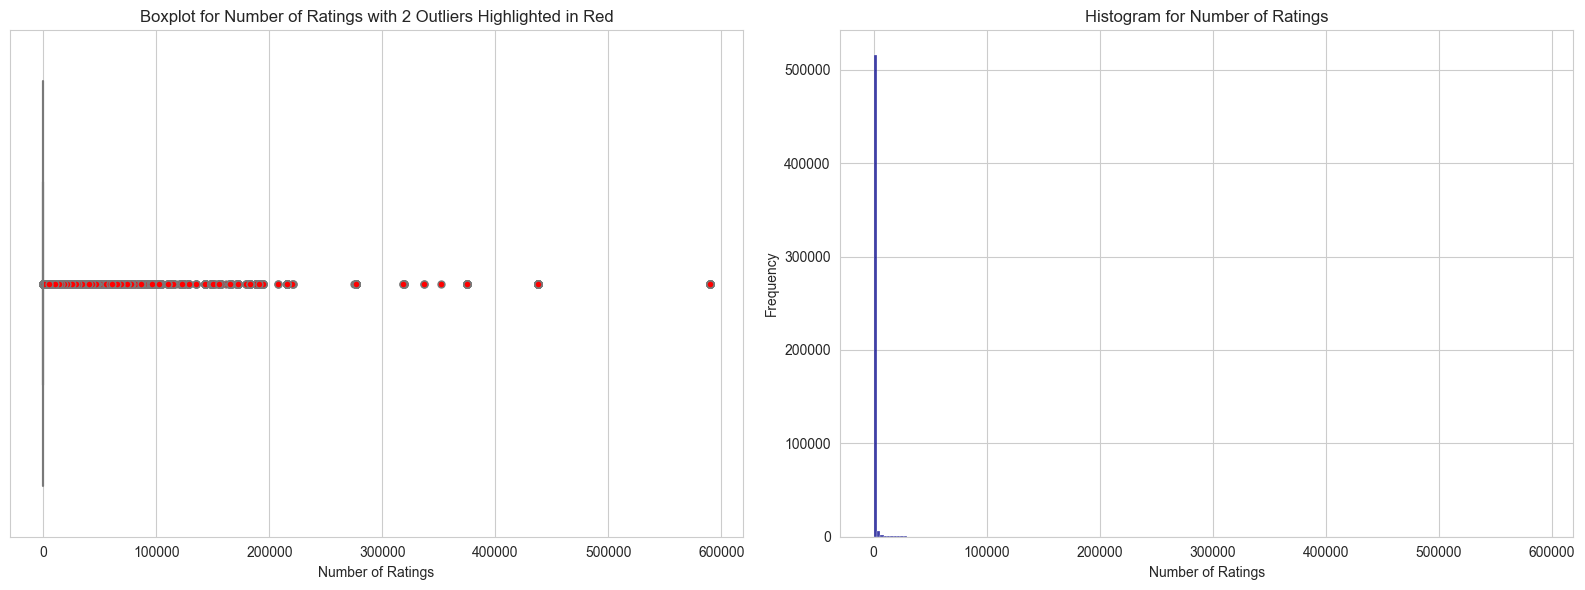

In [42]:
# Convert 'no_of_ratings' column to numeric
combined_df['no_of_ratings'] = pd.to_numeric(combined_df['no_of_ratings'], errors='coerce')

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First subplot (Boxplot)
boxplot = sns.boxplot(x=combined_df['no_of_ratings'], color='lightblue', flierprops=dict(markerfacecolor='red', marker='o'), whis=1.5, ax=axes[0])
outliers = [f.get_ydata() for f in boxplot.get_children() if isinstance(f, plt.Line2D)][0]
outlier_list = list(outliers)
axes[0].set_xlabel('Number of Ratings')
axes[0].set_title(f'Boxplot for Number of Ratings with {len(outlier_list)} Outliers Highlighted in Red')

# Second subplot (Histogram)
histogram = sns.histplot(data=combined_df, x='no_of_ratings', bins=200, color='darkblue', ax=axes[1])
axes[1].set_xlabel('Number of Ratings')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram for Number of Ratings')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()


The displayed records are outliers with extremely high values in the "no_of_ratings" column. These outliers are SanDisk products in the Camera Accessories category, all having the same number of ratings (589,547). It is unusual for all these products to have precisely the same number of ratings, suggesting some anomaly or data error.

The "actual_price_eur" and "discount_price_eur" columns also show varying values for these products, indicating actual price differences among them. These outliers may represent products that are somehow unique or special, but without further information, it is challenging to explain why they all have the same number of ratings.

These outlier products likely represent instances where Amazon has aggregated ratings and reviews for various versions or capacities of the same product, such as memory cards with different storage capacities (128GB, 16GB, 64GB, etc.). Amazon often consolidates reviews for similar items under a single product listing, especially when the products are identical or nearly identical in terms of functionality and brand. Customers can then leave reviews and ratings for all variations of the product on a single page.

In this case, it's essential to recognize that these outliers are not typical individual products but rather a collection of similar products grouped together by Amazon. While this aggregation can lead to anomalous data entries, it's a common practice on e-commerce platforms to streamline reviews and ratings for the convenience of customers.

When conducting data analysis or modeling, it's crucial to decide whether to treat these aggregated products as individual entities or group them for analysis, depending on the specific research goals and questions. If necessary, we can filter, group, or transform the data to align with our analysis objectives.

In [43]:
# Drop columns that are not relevant for analysis from the DataFrame
combined_df.drop(["actual_price", "discount_price", "image", "link"], axis=1, inplace=True)

# Select rows with the highest values in the "no_of_ratings" column
top_high_ratings = combined_df.nlargest(5, 'no_of_ratings')

# Display these selected rows
display(top_high_ratings)


,name,main_category,sub_category,ratings,no_of_ratings,brand,actual_price_eur,discount_price_eur,discount_percentage
89489,SanDisk 128GB Class 10 microSDXC Memory Card w...,"tv, audio & cameras",Camera Accessories,4.30,589547.00,SanDisk,45.38,19.35,57.36
89669,SanDisk 16GB Ultra MicroSDHC Memory Card (SDSQ...,"tv, audio & cameras",Camera Accessories,4.30,589547.00,SanDisk,5.67,5.62,0.88
89823,SanDisk Ultra 64GB UHS-I Class 10 Micro SD Mem...,"tv, audio & cameras",Camera Accessories,4.30,589547.00,SanDisk,11.35,8.51,25.02
90090,SanDisk UHS-I A1 98Mbps 32GB Ultra MicroSD Mem...,"tv, audio & cameras",Camera Accessories,4.30,589547.00,SanDisk,7.94,5.94,25.19
91265,SanDisk 256GB Class 10 MicroSD Card with Adapt...,"tv, audio & cameras",Camera Accessories,4.30,589547.00,SanDisk,90.78,37.72,58.45


In [44]:
# Create a condition to identify rows that are duplicates based on specific columns
duplicate_condition = (
    (combined_df['ratings'] != 0) &             # Ratings are not zero
    (combined_df['no_of_ratings'] != 0) &       # Number of ratings is not zero
    combined_df.duplicated(subset=['ratings', 'no_of_ratings', 'brand', "actual_price_eur"], keep=False)  # Check for duplicates
)

# Get the indices of rows that meet the duplicate condition
duplicate_indices = combined_df.index[duplicate_condition].tolist()

# Display the first 10 indices of rows that are duplicates
print("First 10 duplicate indices:")
print(duplicate_indices[:10])

# Display the first 5 and last 5 rows of the DataFrame corresponding to these duplicate indices
display(combined_df.loc[duplicate_indices[:5]])
display(combined_df.loc[duplicate_indices[-5:]])


First 10 duplicate indices:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


,name,main_category,sub_category,ratings,no_of_ratings,brand,actual_price_eur,discount_price_eur,discount_percentage
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.20,2255.00,Lloyd,669.46,374.50,44.06
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.20,2948.00,LG,862.39,527.60,38.82
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.20,1206.00,LG,703.51,391.42,44.36
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.00,69.00,LG,782.95,431.14,44.93
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.10,630.00,Carrier,769.33,391.42,49.12


,name,main_category,sub_category,ratings,no_of_ratings,brand,actual_price_eur,discount_price_eur,discount_percentage
1058130,"L'Oréal Paris Serum, Protection and Shine, For...",beauty & health,Value Bazaar,4.30,22587.00,L'Oréal,3.39,3.22,5.01
1058141,Bajaj 100% Pure Coconut Oil 600 ml,beauty & health,Value Bazaar,4.30,4393.00,Bajaj,2.83,1.37,51.59
1058148,"Dove Intense Repair Shampoo 1 L, Repairs Dry a...",beauty & health,Value Bazaar,4.30,21397.00,Dove,8.85,7.03,20.56
1058159,UrbanBotanics® Cold Pressed Castor Oil for Hai...,beauty & health,Value Bazaar,4.30,8908.00,UrbanBotanics®,2.83,2.14,24.38
1058161,MOTHER DAIRY Cow GHEE CEKA Pack 1LTR,beauty & health,Value Bazaar,4.30,6370.00,MOTHER,9.65,9.64,0.10


In [45]:
# Filter rows
filtered_rows = combined_df[
    (combined_df['ratings'] == 4.30) & 
    (combined_df['brand'] == 'MOTHER') & 
    (combined_df['no_of_ratings'] == 6370.00) & 
    (combined_df['sub_category'] == 'Value Bazaar') &
    (combined_df['actual_price_eur'] == 9.65)
]

# Display the filtered rows that meet the specified criteria
display(filtered_rows)

,name,main_category,sub_category,ratings,no_of_ratings,brand,actual_price_eur,discount_price_eur,discount_percentage
535328,MOTHER DAIRY Cow GHEE CEKA Pack 1LTR,beauty & health,Value Bazaar,4.30,6370.00,MOTHER,9.65,9.64,0.10
1058161,MOTHER DAIRY Cow GHEE CEKA Pack 1LTR,beauty & health,Value Bazaar,4.30,6370.00,MOTHER,9.65,9.64,0.10


In [46]:
# Remove all duplicates from the DataFrame
combined_df = combined_df.drop_duplicates()

# Display the DataFrame after removing duplicates
print(combined_df.shape)


(497775, 9)


In [47]:
# Filter rows
filtered_rows = combined_df[
    (combined_df['ratings'] == 4.30) & 
    (combined_df['brand'] == 'MOTHER') & 
    (combined_df['no_of_ratings'] == 6370.00) & 
    (combined_df['sub_category'] == 'Value Bazaar') &
    (combined_df['actual_price_eur'] == 9.65)
]

# Display the filtered rows that meet the specified criteria
display(filtered_rows)

,name,main_category,sub_category,ratings,no_of_ratings,brand,actual_price_eur,discount_price_eur,discount_percentage
535328,MOTHER DAIRY Cow GHEE CEKA Pack 1LTR,beauty & health,Value Bazaar,4.30,6370.00,MOTHER,9.65,9.64,0.10


In [48]:
# Create a condition to identify rows that are duplicates based on specific columns
duplicate_condition = (
    (combined_df['ratings'] != 0) &             # Ratings are not zero
    (combined_df['no_of_ratings'] != 0) &       # Number of ratings is not zero
    combined_df.duplicated(subset=['ratings', 'no_of_ratings', 'brand', "actual_price_eur", "name", 'main_category', 'discount_price_eur'], keep=False)  # Check for duplicates
)

# Get the indices of rows that meet the duplicate condition
duplicate_indices = combined_df.index[duplicate_condition].tolist()

# Display the first 10 indices of rows that are duplicates
print("First 10 duplicate indices:")
print(duplicate_indices[:10])

# Display the first 5 and last 5 rows of the DataFrame corresponding to these duplicate indices
display(combined_df.loc[duplicate_indices[:5]])
display(combined_df.loc[duplicate_indices[-5:]])

# Count the number of rows with duplicates
num_duplicates = len(duplicate_indices)

# Display the number of rows with duplicates
print("Number of rows with duplicates:", num_duplicates)


First 10 duplicate indices:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


,name,main_category,sub_category,ratings,no_of_ratings,brand,actual_price_eur,discount_price_eur,discount_percentage
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.20,2255.00,Lloyd,669.46,374.50,44.06
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.20,2948.00,LG,862.39,527.60,38.82
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.20,1206.00,LG,703.51,391.42,44.36
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.00,69.00,LG,782.95,431.14,44.93
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.10,630.00,Carrier,769.33,391.42,49.12


,name,main_category,sub_category,ratings,no_of_ratings,brand,actual_price_eur,discount_price_eur,discount_percentage
579552,ADBUCKS Winter Wear Jacket Inside Full Black &...,sports & fitness,Yoga,3.80,211.00,ADBUCKS,22.69,10.54,53.55
579649,Men Cycling Underwear Shorts Breathable Gel Pa...,sports & fitness,Yoga,4.70,3.00,Men,62.41,30.97,50.38
579657,Adidas Regular Fit Women's Tees,sports & fitness,Yoga,3.50,9.00,Adidas,18.15,14.51,20.06
579660,"JUST RIDER Cotton Made Brief Shape, Athletic C...",sports & fitness,Yoga,4.40,3.00,JUST,2.49,2.49,0.00
579732,PROIRON NBR Yoga Mat 1830×660×10 mm - PURPLE P...,sports & fitness,Yoga,4.50,2230.00,PROIRON,42.27,28.09,33.55


Number of rows with duplicates: 78843


In [49]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497775 entries, 0 to 1058164
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   name                 497775 non-null  category
 1   main_category        497775 non-null  category
 2   sub_category         497775 non-null  category
 3   ratings              497775 non-null  float64 
 4   no_of_ratings        497775 non-null  float64 
 5   brand                497775 non-null  object  
 6   actual_price_eur     497775 non-null  float64 
 7   discount_price_eur   497775 non-null  float64 
 8   discount_percentage  497775 non-null  float64 
dtypes: category(3), float64(5), object(1)
memory usage: 56.4+ MB


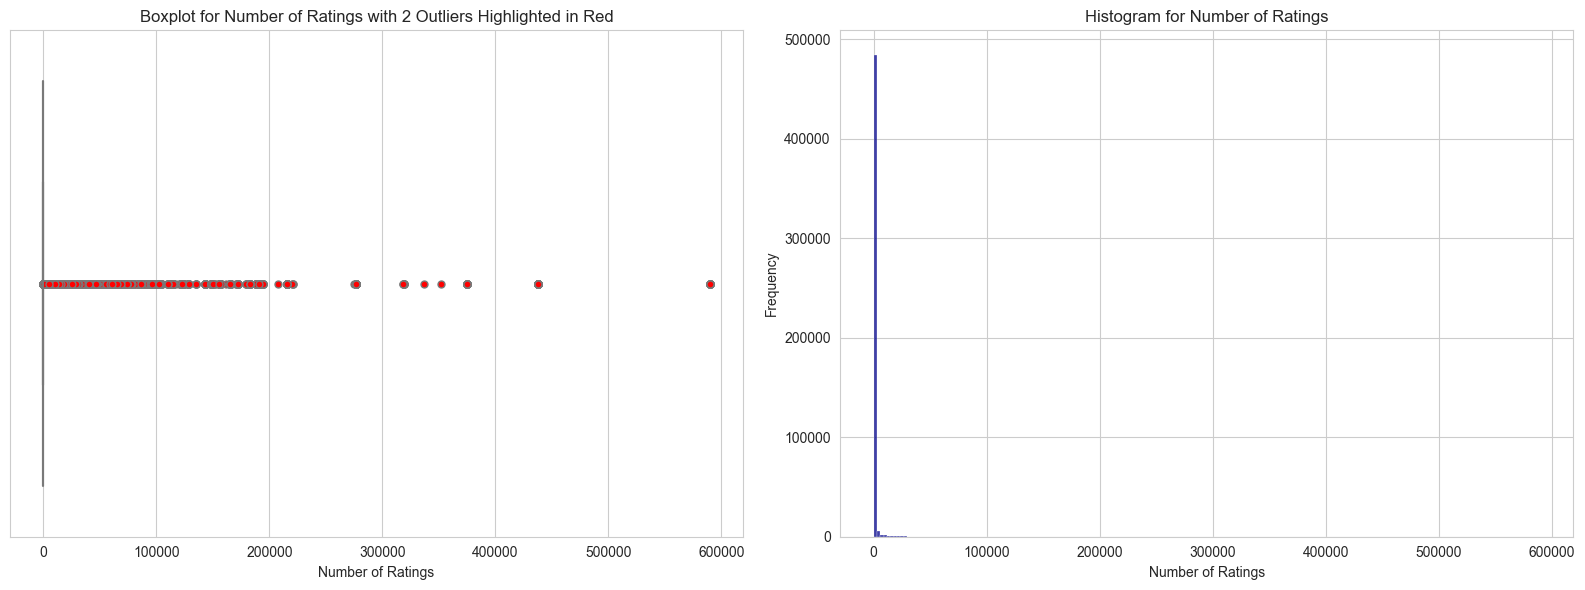

In [50]:
# Convert 'no_of_ratings' column to numeric
combined_df['no_of_ratings'] = pd.to_numeric(combined_df['no_of_ratings'], errors='coerce')

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First subplot (Boxplot)
boxplot = sns.boxplot(x=combined_df['no_of_ratings'], color='lightblue', flierprops=dict(markerfacecolor='red', marker='o'), whis=1.5, ax=axes[0])
outliers = [f.get_ydata() for f in boxplot.get_children() if isinstance(f, plt.Line2D)][0]
outlier_list = list(outliers)
axes[0].set_xlabel('Number of Ratings')
axes[0].set_title(f'Boxplot for Number of Ratings with {len(outlier_list)} Outliers Highlighted in Red')

# Second subplot (Histogram)
histogram = sns.histplot(data=combined_df, x='no_of_ratings', bins=200, color='darkblue', ax=axes[1])
axes[1].set_xlabel('Number of Ratings')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram for Number of Ratings')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()

**Boxplot Observations:**

- **Outliers:** There are several points that stand out as outliers, with two of them highlighted in red. These are significantly higher than the rest, indicating that a few products have an unusually high number of ratings.
- **Median and Quartiles:** The boxplot likely shows a median that is very low relative to the range of data, given the concentration of data points near zero. This is consistent with the median of 6 you mentioned earlier. The interquartile range (IQR) is also very narrow, suggesting that the majority of products have a similar, low count of ratings.
- **Data Spread:** The spread of the data is extremely skewed to the right, with outliers pulling the mean upward.

**Histogram Observations:**

- **Skewness:** The histogram confirms that the distribution of the number of ratings is highly right-skewed. This means there are a few products with a very high number of ratings, while the vast majority have few ratings.
- **Frequency:** The highest frequency is at the very beginning of the scale, indicating that most products have a number of ratings close to zero.

**Combined Insights:**

- These visualizations support the initial summary of the descriptive statistics, showing a large variance in how often products are rated and confirming the presence of outliers.
- The vast majority of products have very few ratings, as shown by the concentration of data at the lower end of the scale in both the boxplot and histogram.
- The few products with an extreme number of ratings could potentially skew any analysis or modeling efforts. It may be worth considering whether to exclude these outliers or to transform the data to minimize their influence.

In [51]:
# Calculate the median and IQR (Interquartile Range)
median = combined_df['no_of_ratings'].median()  # Calculate the median of the actual prices
q1 = combined_df['no_of_ratings'].quantile(0.25)  # Calculate the first quartile (25th percentile)
q3 = combined_df['no_of_ratings'].quantile(0.75)  # Calculate the third quartile (75th percentile)
iqr = q3 - q1  # Calculate the Interquartile Range (IQR)

# Set a threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5 * iqr

# Identify outliers
outliers = combined_df[(combined_df['no_of_ratings'] < (median - threshold)) | (combined_df['no_of_ratings'] > (median + threshold))]

# Create a list of outlier values
outlier_values = outliers['no_of_ratings'].values.tolist()

# Count the number of outliers
num_outliers = len(outlier_values)

# Display the number of outliers and the list of outlier values
print(f'Number of Outliers: {num_outliers}')


Number of Outliers: 102706


In [52]:
# Calculate the total number of values in the column
total_values = len(combined_df['no_of_ratings'])

# Calculate the number of outliers
num_outliers = len(outliers)

# Calculate the percentage of outliers
outlier_percentage = (num_outliers / total_values) * 100

# Display the percentage of outliers
print(f'Percentage of Outliers: {outlier_percentage:.2f}%')


Percentage of Outliers: 20.63%


In [53]:
# Definition der Grenzen für Ausreißer
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Adding a column to segment outliers of no_of_ratings
combined_df['outlier_no_ratings'] = ((combined_df['no_of_ratings'] < lower_bound) | (combined_df['no_of_ratings'] > upper_bound))

# Show new dataframe
display(combined_df.head())

,name,main_category,sub_category,ratings,no_of_ratings,brand,actual_price_eur,discount_price_eur,discount_percentage,outlier_no_ratings
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.20,2255.00,Lloyd,669.46,374.50,44.06,True
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.20,2948.00,LG,862.39,527.60,38.82,True
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.20,1206.00,LG,703.51,391.42,44.36,True
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.00,69.00,LG,782.95,431.14,44.93,False
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.10,630.00,Carrier,769.33,391.42,49.12,True


In [54]:
# Schritt 1: Zählen der Produkte in jeder Gruppe
group_counts = combined_df.groupby(['ratings', 'no_of_ratings', 'brand']).size().reset_index(name='counts')
display(group_counts)

# Schritt 2: Merge der Zählung zurück in den ursprünglichen DataFrame
combined_df = pd.merge(combined_df, group_counts, on=['ratings', 'no_of_ratings', 'brand'])

combined_df['no_of_ratings_norm'] = combined_df["no_of_ratings"]/combined_df["counts"]

display(combined_df.head())


,ratings,no_of_ratings,brand,counts
0,0.00,0.00,"""",2
1,0.00,0.00,"""7""",1
2,0.00,0.00,"""Honeywell",1
3,0.00,0.00,"""Jai",1
4,0.00,0.00,"""Jean",1
...,...,...,...,...
277433,5.00,73.00,Meadbery,1
277434,5.00,74.00,Amazon,2
277435,5.00,78.00,COROID-Table,3
277436,5.00,81.00,RAWLS,1


,name,main_category,sub_category,ratings,no_of_ratings,brand,actual_price_eur,discount_price_eur,discount_percentage,outlier_no_ratings,counts,no_of_ratings_norm
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.20,2255.00,Lloyd,669.46,374.50,44.06,True,4,563.75
1,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,All Appliances,4.20,2255.00,Lloyd,669.46,374.50,44.06,True,4,563.75
2,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Heating & Cooling Appliances,4.20,2255.00,Lloyd,669.46,374.50,44.06,True,4,563.75
3,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Kitchen & Home Appliances,4.20,2255.00,Lloyd,669.46,374.50,44.06,True,4,563.75
4,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.20,2948.00,LG,862.39,527.60,38.82,True,4,737.00


In [55]:
# Generate descriptive statistics
combined_df.describe()

,ratings,no_of_ratings,actual_price_eur,discount_price_eur,discount_percentage,counts,no_of_ratings_norm
count,497775.00,497775.00,497775.00,497775.00,497775.00,497775.00,497775.00
mean,2.79,586.52,275.44,30.39,47.11,149.10,266.95
std,1.81,7221.69,159247.50,107.56,23.74,697.59,2356.56
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,0.00,0.00,11.24,4.41,30.80,1.00,0.00
50%,3.60,6.00,18.10,7.71,50.09,2.00,4.20
75%,4.10,62.00,34.03,15.99,65.66,6.00,44.00
max,5.00,589547.00,112352027.26,14185.75,100.00,5198.00,351441.00


In [56]:
plt.figure(figsize=(12, 7))
# Avoid log(0) issue by adding 1 before taking the log
sns.histplot(combined_df['no_of_ratings_norm'] + 1, bins=500000, kde=False, color='blue')
#plt.yscale('log')  # Log scale for the y-axis
plt.xscale('log')
#plt.xlim(0, 360000)
plt.xlabel('Normalized Number of Ratings')
plt.ylabel('Count of Products')
plt.title('Log-scaled Distribution of Normalized Number of Ratings')
plt.grid(True)
plt.show()


In [ ]:
# To delete the 'no_of_ratings' column from the DataFrame
combined_df.drop('no_of_ratings', axis=1, inplace=True)

# To rename the 'no_of_ratings_norm' column to 'no_of_ratings'
combined_df.rename(columns={'no_of_ratings_norm': 'no_of_ratings'}, inplace=True)


In [ ]:
# Select rows with the top values in the "no_of_ratings" column
top_high_ratings = combined_df.nlargest(5, 'no_of_ratings')

# Display these rows
display(top_high_ratings)

,name,main_category,sub_category,ratings,brand,actual_price_eur,discount_price_eur,discount_percentage,outlier_no_ratings,counts,no_of_ratings
32580,AmazonBasics AAA Performance Alkaline Non-rech...,"tv, audio & cameras",All Electronics,4.40,AmazonBasics,10.21,7.25,28.99,True,1,351441.00
35337,AmazonBasics AA Performance Alkaline Non-Recha...,"tv, audio & cameras",All Electronics,4.50,AmazonBasics,16.97,10.54,37.89,True,1,336487.00
1743,Pigeon Polypropylene Mini Handy and Compact Ch...,appliances,All Appliances,4.10,Pigeon,6.19,2.26,63.49,True,1,274505.00
340494,Gildan Men's White Crew T-Shirt Multipack,men's clothing,Innerwear,4.60,Gildan,55.56,55.56,0.00,True,1,219589.00
298690,TOZO T6 True Wireless Earbuds Bluetooth Headph...,"tv, audio & cameras",Headphones,4.40,TOZO,113.48,68.08,40.01,True,1,207261.00


In [ ]:
# Generate descriptive statistics
combined_df.describe()

,ratings,actual_price_eur,discount_price_eur,discount_percentage,counts,no_of_ratings
count,497775.00,497775.00,497775.00,497775.00,497775.00,497775.00
mean,2.79,275.44,30.39,47.11,156.80,266.93
std,1.81,159247.50,107.56,23.74,708.47,2356.56
min,0.00,0.00,0.00,0.00,1.00,0.00
25%,0.00,11.24,4.41,30.80,1.00,0.00
50%,3.60,18.10,7.71,50.09,2.00,4.00
75%,4.10,34.03,15.99,65.66,7.00,44.00
max,5.00,112352027.26,14185.75,100.00,5200.00,351441.00


After that, let´s do the same for the Actual Price and visualize the distribution:

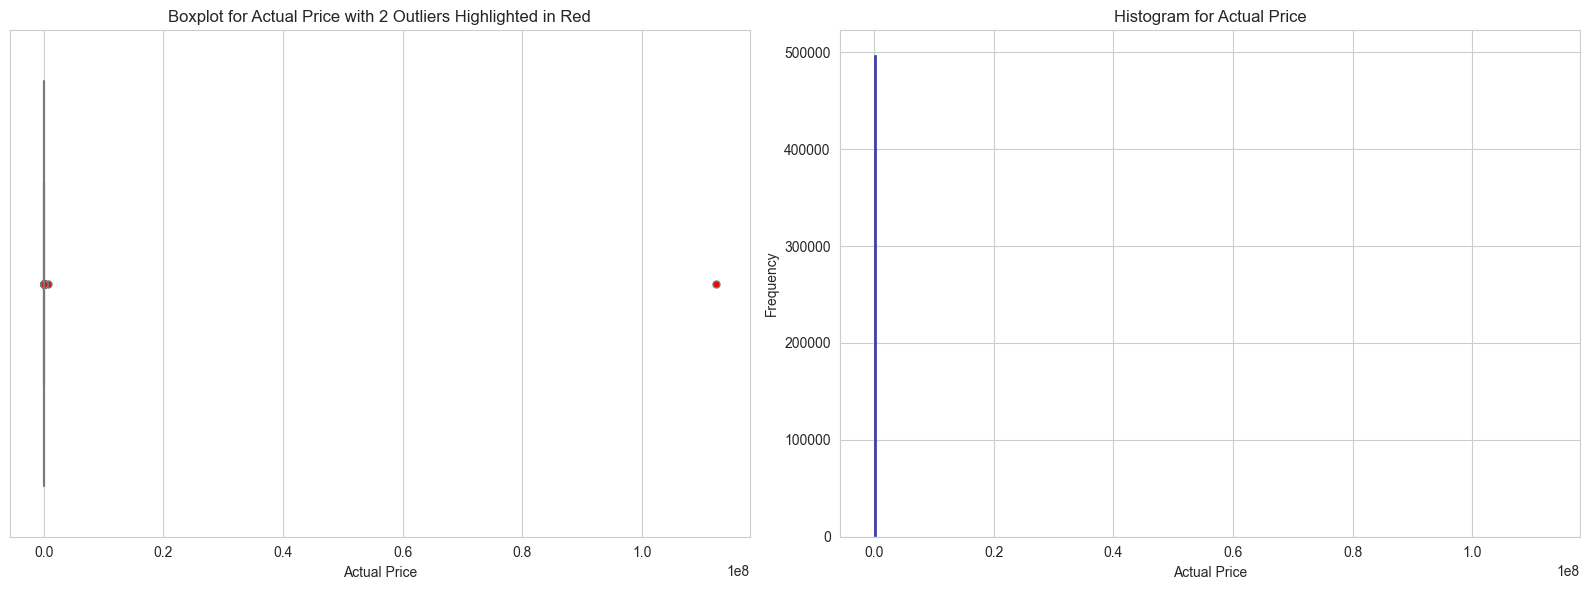

In [ ]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First subplot (Boxplot)
boxplot = sns.boxplot(x=combined_df['actual_price_eur'], color='lightblue', flierprops=dict(markerfacecolor='red', marker='o'), whis=1.5, ax=axes[0])

# Extract the outliers
outliers = [f.get_ydata() for f in boxplot.get_children() if isinstance(f, plt.Line2D)][0]
outlier_list = list(outliers)

# Set labels and title of first subplot
axes[0].set_xlabel('Actual Price')
axes[0].set_title(f'Boxplot for Actual Price with {len(outlier_list)} Outliers Highlighted in Red')

# Second subplot (Histogram)
histogram = sns.histplot(data=combined_df, x='actual_price_eur', bins=200, color='darkblue', ax=axes[1])
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram for Actual Price')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()


Seems to be some extremly high values. Therefore have a look at them in detail. Especially the first two products are very interesting. 

In [ ]:
# Select rows with the top values in the "actual_price_eur" column
top_high_ratings = combined_df.nlargest(10, 'actual_price_eur')

# Display these rows
display(top_high_ratings)


,name,main_category,sub_category,ratings,brand,actual_price_eur,discount_price_eur,discount_percentage,outlier_no_ratings,counts,no_of_ratings
282602,"Marutivilla Insect Killer, Mosquito Killer Lig...",home & kitchen,Garden & Outdoors,2.00,Marutivilla,112352027.26,6.68,100.00,False,1,1.00
213307,Clovia Women's Activewear Ankle Length Printed...,sports & fitness,Running,3.20,Clovia,693211.89,7.81,100.00,False,3,1.33
458849,Samsung 214 cm (85 inches) 8K Ultra HD Smart N...,"tv, audio & cameras",Televisions,4.00,Samsung,18100.03,14185.75,21.63,False,1,10.00
356827,USPTO डायमंड वन स्टोन D Colour Genuine 3 Carat...,accessories,Jewellery,0.00,USPTO,13618.43,4607.67,66.17,False,21,0.00
356845,USPTO डायमंड वन स्टोन D Colour Genuine 3 Carat...,kids' fashion,Kids' Fashion,0.00,USPTO,13618.43,4607.67,66.17,False,21,0.00
356846,USPTO डायमंड वन स्टोन D Colour Genuine 3 Carat...,stores,Men's Fashion,0.00,USPTO,13618.43,4607.67,66.17,False,21,0.00
237714,Venus Gems Gallery Real Diamond Ring 2 Carat O...,accessories,Fashion & Silver Jewellery,0.00,Venus,11348.69,5674.33,50.00,False,23,0.00
237718,Venus Gems Gallery Real Diamond Ring 2 Carat O...,accessories,Jewellery,0.00,Venus,11348.69,5674.33,50.00,False,23,0.00
356826,USPTO 2.85 Carat Real GIA Certifed Diamond Loo...,accessories,Jewellery,0.00,USPTO,10440.79,5220.39,50.00,False,21,0.00
357837,Alaska Gems Gallery Colombian Panna 8 Ratti 7....,accessories,Jewellery,0.00,Alaska,9896.06,4948.02,50.00,False,21,0.00


In [ ]:
# Drop unrealistic outliers
combined_df.drop(282602, inplace=True)
combined_df.drop(213307, inplace=True)

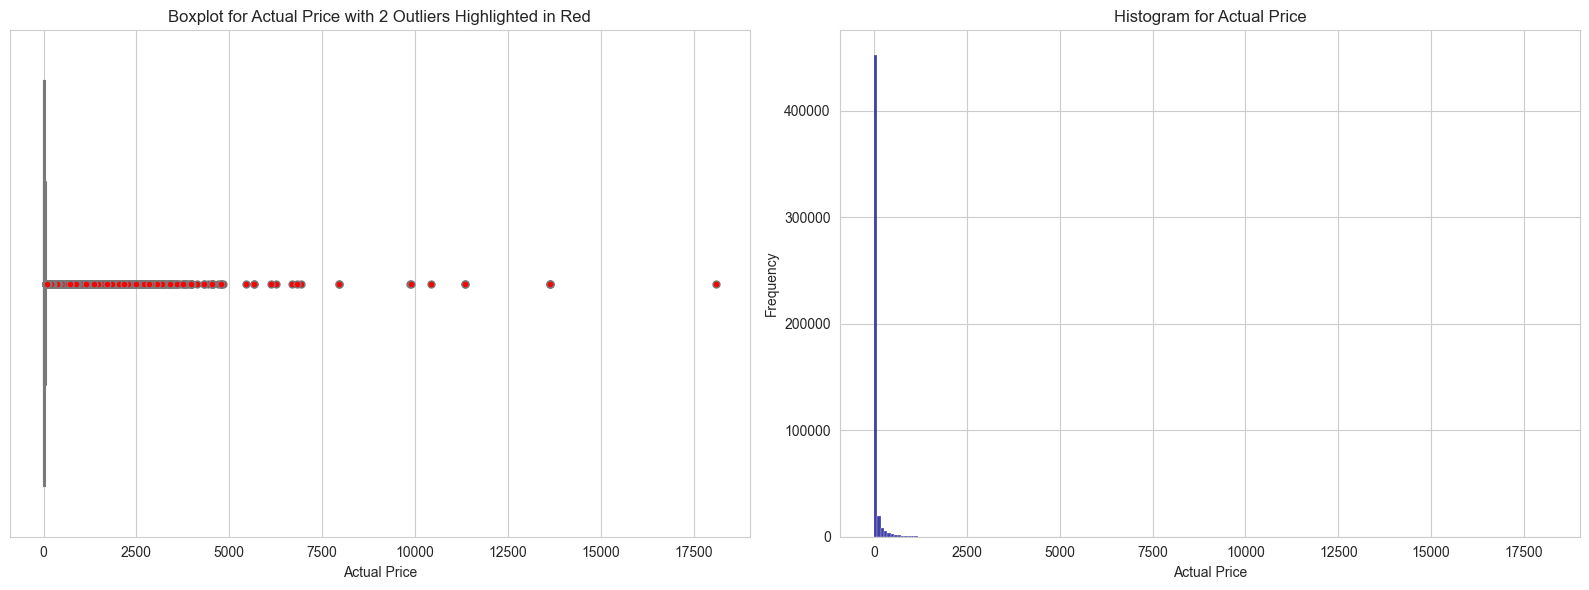

In [ ]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First subplot (Boxplot)
boxplot = sns.boxplot(x=combined_df['actual_price_eur'], color='lightblue', flierprops=dict(markerfacecolor='red', marker='o'), whis=1.5, ax=axes[0])

# Extract the outliers
outliers = [f.get_ydata() for f in boxplot.get_children() if isinstance(f, plt.Line2D)][0]
outlier_list = list(outliers)

axes[0].set_xlabel('Actual Price')
axes[0].set_title(f'Boxplot for Actual Price with {len(outlier_list)} Outliers Highlighted in Red')

# Second subplot (Histogram)
histogram = sns.histplot(data=combined_df, x='actual_price_eur', bins=200, color='darkblue', ax=axes[1])
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram for Actual Price')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()


In [ ]:
# Calculate the median and IQR (Interquartile Range)
median = combined_df['actual_price_eur'].median()  # Calculate the median of the actual prices
q1 = combined_df['actual_price_eur'].quantile(0.25)  # Calculate the first quartile (25th percentile)
q3 = combined_df['actual_price_eur'].quantile(0.75)  # Calculate the third quartile (75th percentile)
iqr = q3 - q1  # Calculate the Interquartile Range (IQR)

# Set a threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5 * iqr

# Identify outliers
outliers = combined_df[(combined_df['actual_price_eur'] < (median - threshold)) | (combined_df['actual_price_eur'] > (median + threshold))]

# Create a list of outlier values
outlier_values = outliers['actual_price_eur'].values.tolist()

# Count the number of outliers
num_outliers = len(outlier_values)

# Display the number of outliers and the list of outlier values
print(f'Number of Outliers: {num_outliers}')


Number of Outliers: 77873


In [ ]:
# Calculate the total number of values in the column
total_values = len(combined_df['actual_price_eur'])

# Calculate the number of outliers
num_outliers = len(outliers)

# Calculate the percentage of outliers
outlier_percentage = (num_outliers / total_values) * 100

# Display the percentage of outliers
print(f'Percentage of Outliers: {outlier_percentage:.2f}%')


Percentage of Outliers: 15.64%


In [ ]:
# Bestimmen der Grenzen für Ausreißer
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Kennzeichnen von Ausreißern in einer neuen Spalte
combined_df['outlier_price'] = combined_df['actual_price_eur'].apply(lambda x: 'True' if x < lower_bound or x > upper_bound else 'False')

display(combined_df.head())


,name,main_category,sub_category,ratings,brand,actual_price_eur,discount_price_eur,discount_percentage,outlier_no_ratings,counts,no_of_ratings,outlier_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.20,Lloyd,669.46,374.50,44.06,True,4,563.75,Outlier
1,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,All Appliances,4.20,Lloyd,669.46,374.50,44.06,True,4,563.75,Outlier
2,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Heating & Cooling Appliances,4.20,Lloyd,669.46,374.50,44.06,True,4,563.75,Outlier
3,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Kitchen & Home Appliances,4.20,Lloyd,669.46,374.50,44.06,True,4,563.75,Outlier
4,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.20,LG,862.39,527.60,38.82,True,4,737.00,Outlier


In [ ]:
# Assuming 'outliers' is a DataFrame that contains all outliers, and 'combined_df' is the entire DataFrame.

# Calculate the number of outliers in each main_category
outliers_count_per_category = outliers['main_category'].value_counts()

# Calculate the total number of outliers
num_outliers = outliers_count_per_category.sum()

# Calculate the percentage of outliers in each main_category
outliers_percentage_per_category = (outliers_count_per_category / num_outliers) * 100

# Display the percentage of outliers in each main_category
print(outliers_percentage_per_category)


accessories               31.43
tv, audio & cameras       18.00
men's shoes               14.13
appliances                11.97
stores                     8.09
women's clothing           5.99
bags & luggage             2.02
sports & fitness           1.67
men's clothing             1.44
home & kitchen             1.12
industrial supplies        0.88
women's shoes              0.69
toys & baby products       0.60
kids' fashion              0.53
car & motorbike            0.51
beauty & health            0.46
music                      0.38
pet supplies               0.06
grocery & gourmet foods    0.03
home, kitchen, pets        0.01
Name: main_category, dtype: float64


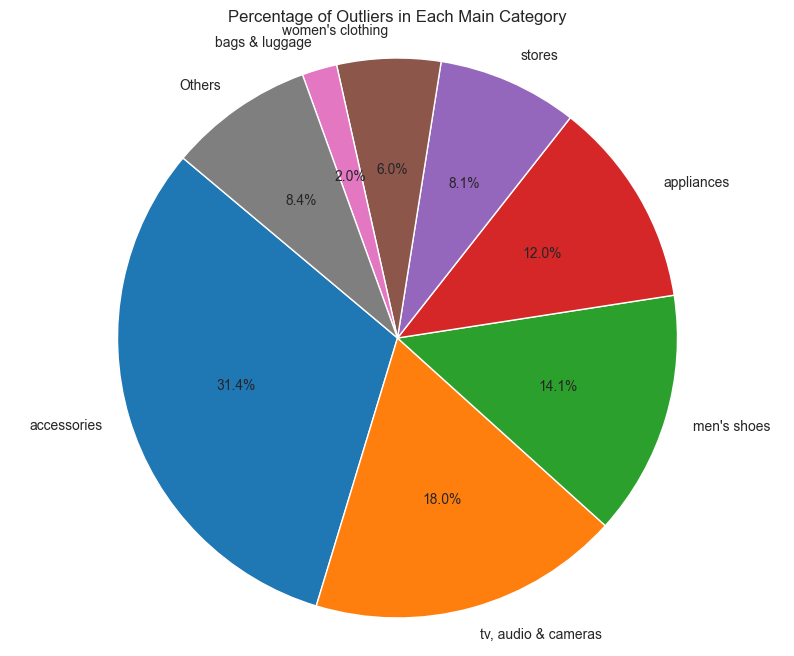

In [ ]:
import matplotlib.pyplot as plt

# Berechnung der Ausreißerprozentsätze, bereits im vorherigen Schritt erfolgt

# Kategorien unter 5% in 'Others' zusammenfassen
threshold = 2  # Prozent
small_categories = outliers_percentage_per_category[outliers_percentage_per_category < threshold]
big_categories = outliers_percentage_per_category[outliers_percentage_per_category >= threshold]
others_percentage = small_categories.sum()
if others_percentage > 0:
    big_categories['Others'] = others_percentage

# Pie-Plot erstellen
plt.figure(figsize=(10, 8))
plt.pie(big_categories, labels=big_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Outliers in Each Main Category')
plt.axis('equal')  # Damit der Pie-Plot kreisförmig erscheint
plt.show()


In [ ]:
# Assuming 'outliers' is a DataFrame that contains all outliers, and 'combined_df' is the entire DataFrame.

# Calculate the number of outliers in each main_category
outliers_count_per_category = outliers['sub_category'].value_counts()

# Calculate the total number of outliers
num_outliers = outliers_count_per_category.sum()

# Calculate the percentage of outliers in each main_category
outliers_percentage_per_category = (outliers_count_per_category / num_outliers) * 100

# Display the percentage of outliers in each main_category
print(outliers_percentage_per_category.head(20))


Gold & Diamond Jewellery       15.98
Sportswear                      5.16
Casual Shoes                    5.13
Security Cameras                5.09
Ethnic Wear                     4.66
Watches                         4.66
Formal Shoes                    4.61
Sports Shoes                    4.40
Jewellery                       3.48
Heating & Cooling Appliances    3.30
Cameras                         3.14
Kitchen & Home Appliances       2.84
All Appliances                  2.82
Handbags & Clutches             2.75
Bags & Luggage                  2.67
All Electronics                 2.15
Men's Fashion                   1.97
Camera Accessories              1.78
Speakers                        1.73
Headphones                      1.70
Name: sub_category, dtype: float64


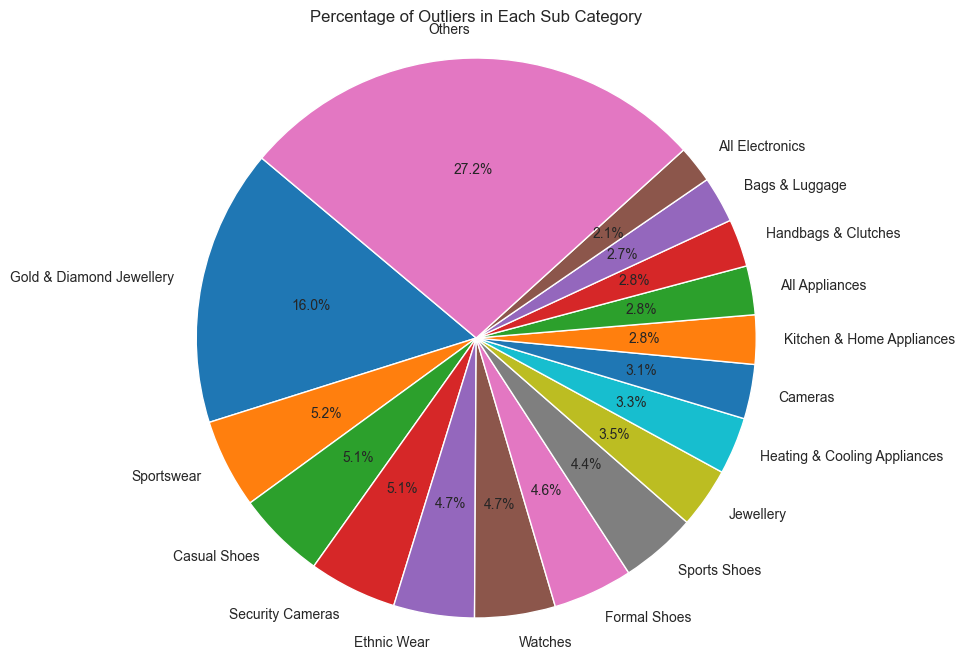

In [ ]:
# Kategorien unter 5% in 'Others' zusammenfassen
threshold = 2  # Prozent
small_categories = outliers_percentage_per_category[outliers_percentage_per_category < threshold]
big_categories = outliers_percentage_per_category[outliers_percentage_per_category >= threshold]
others_percentage = small_categories.sum()
if others_percentage > 0:
    big_categories['Others'] = others_percentage

# Pie-Plot erstellen
plt.figure(figsize=(10, 8))
plt.pie(big_categories, labels=big_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Outliers in Each Sub Category')
plt.axis('equal')  # Damit der Pie-Plot kreisförmig erscheint
plt.show()


In [ ]:
# Filter the DataFrame for a specific main_category, for example 'Electronics'
specific_category_outliers = outliers[outliers['sub_category'] == 'Sportswear'].sort_values(by='actual_price_eur', ascending=False)


# Display the first few rows of this specific category
display(specific_category_outliers.head(10))


,name,main_category,sub_category,ratings,brand,actual_price_eur,discount_price_eur,discount_percentage,outlier_no_ratings,counts,no_of_ratings
375618,Nike Zoom Freak 1,stores,Sportswear,4.60,Nike,725.29,725.29,0.00,False,3,10.67
445085,Nike Big Kids AIR Vapormax Flyknit 3 Running S...,stores,Sportswear,4.90,Nike,725.09,725.09,0.00,False,1,29.00
445140,Nike Air Max Tailwind Iv Mens Aq2567-400,stores,Sportswear,4.50,Nike,714.90,714.90,0.00,False,1,42.00
444925,Air Jordan 4 Retro Se (gs) Big Kids Ct5343-007,stores,Sportswear,4.40,Air,714.88,714.88,0.00,False,1,4.00
445213,Nike Mens Air Vapormax Plus Mens Mens 924453-604,stores,Sportswear,4.70,Nike,714.88,714.88,0.00,False,1,18.00
444979,Nike Mens Air Jordan 6 Retro Washed Denim Wash...,stores,Sportswear,4.50,Nike,714.79,714.79,0.00,False,2,18.50
445092,Nike Air Jordan Legacy 312 Low Mens Cd7069-400,stores,Sportswear,4.80,Nike,713.32,713.32,0.00,False,2,6.00
445047,Nike Air Max 720 Waves,stores,Sportswear,4.50,Nike,712.85,712.85,0.00,False,2,32.00
444961,Jordan Max 200,stores,Sportswear,4.30,Jordan,704.68,704.68,0.00,False,1,46.00
164583,Nike Air Vapormax Flyknit 3,stores,Sportswear,5.00,Nike,704.68,704.68,0.00,False,30,0.13


In [ ]:
# Filter the DataFrame for a specific main_category, for example 'Electronics'
specific_category_outliers = outliers[outliers['sub_category'] == 'Gold & Diamond Jewellery'].sort_values(by='actual_price_eur', ascending=False)

# Display the first few rows of this specific category
display(specific_category_outliers.head(10))


,name,main_category,sub_category,ratings,brand,actual_price_eur,discount_price_eur,discount_percentage,outlier_no_ratings,counts,no_of_ratings
287030,Sri Jagdamba Pearls 10 Gm 24kt (999) Yellow Go...,accessories,Gold & Diamond Jewellery,4.40,Sri,7947.49,752.47,90.53,False,2,2.00
242731,PC Jeweller 18k (750) Yellow Gold and Solitair...,accessories,Gold & Diamond Jewellery,0.00,PC,6248.61,5311.32,15.00,False,5200,0.00
242792,PC Jeweller 14k (585) Yellow Gold and Solitair...,accessories,Gold & Diamond Jewellery,0.00,PC,3884.43,3301.77,15.00,False,5200,0.00
243636,PC Jeweller 18k (750) Yellow Gold and Solitair...,accessories,Gold & Diamond Jewellery,0.00,PC,3867.43,3287.32,15.00,False,5200,0.00
246135,PC Jeweller 18KT Yellow Gold and Diamond Stud ...,accessories,Gold & Diamond Jewellery,0.00,PC,3819.36,3246.45,15.00,False,5200,0.00
247352,PC Jeweller The Rudolph 18KT White Gold and So...,accessories,Gold & Diamond Jewellery,0.00,PC,3806.60,3235.61,15.00,False,5200,0.00
247211,PC Jeweller The Torrance 18KT White Gold and S...,accessories,Gold & Diamond Jewellery,0.00,PC,3781.92,3214.63,15.00,False,5200,0.00
243142,PC Jeweller Yellow Gold and Solitaire Pendant ...,accessories,Gold & Diamond Jewellery,0.00,PC,3672.32,3121.48,15.00,False,5200,0.00
247541,PC Jeweller The Molloy 18KT White Gold and Sol...,accessories,Gold & Diamond Jewellery,0.00,PC,3613.03,3071.07,15.00,False,5200,0.00
247436,PC Jeweller The Janko 18KT Yellow Gold and Sol...,accessories,Gold & Diamond Jewellery,0.00,PC,3562.42,3028.06,15.00,False,5200,0.00


In [ ]:
# Filter the DataFrame for a specific main_category, for example 'Electronics'
specific_category_outliers = outliers[outliers['sub_category'] == 'Casual Shoes'].sort_values(by='actual_price_eur', ascending=False)


# Display the first few rows of this specific category
display(specific_category_outliers.head(10))


,name,main_category,sub_category,ratings,brand,actual_price_eur,discount_price_eur,discount_percentage,outlier_no_ratings,counts,no_of_ratings
175806,Nike Air Jordan 1 Mid Mens Basketball Shoes 55...,men's shoes,Casual Shoes,3.60,Nike,714.90,714.90,0.00,False,3,2.00
154052,Men's Jordan 9 Retro Fire Red White/Fire Red-C...,men's shoes,Casual Shoes,5.00,Men's,571.92,571.92,0.00,False,38,0.03
170612,Nike Unisex-Adult Lebron Witness V Ep Basketba...,men's shoes,Casual Shoes,3.80,Nike,571.90,571.90,0.00,False,1,60.00
78029,MS Enterprise Ski Skates Snow Shoes Mini Ski S...,men's shoes,Casual Shoes,0.00,MS,458.87,152.96,66.67,False,51,0.00
174452,Nike Boy's Air Force 1 Low Youths Trainers,men's shoes,Casual Shoes,4.70,Nike,408.49,408.49,0.00,False,3,1.00
168578,Nike Mens Dunk Low Retro Sneaker,men's shoes,Casual Shoes,2.50,Nike,408.31,408.31,0.00,False,1,22.00
170892,Nike Mens Cortez Ultra Running Shoes,men's shoes,Casual Shoes,3.80,Nike,406.47,406.47,0.00,False,2,3.50
170616,Nike mens M Air Zoom Superrep 2 Nn Platform,men's shoes,Casual Shoes,4.60,Nike,382.90,382.90,0.00,False,4,1.50
170508,AKU Trekker Lite III GTX Shoe Grey-Red,men's shoes,Casual Shoes,0.00,AKU,351.81,260.11,26.07,False,4,0.00
68802,Leather Unicorn Low-top Sneakers,men's shoes,Casual Shoes,0.00,Leather,340.45,158.87,53.34,False,89,0.00


In [ ]:
summary = combined_df.describe()
display(summary)

,ratings,actual_price_eur,discount_price_eur,discount_percentage,counts,no_of_ratings
count,497771.00,497771.00,497771.00,497771.00,497771.00,497771.00
mean,2.79,48.34,30.39,47.11,156.80,266.93
std,1.81,144.62,107.56,23.74,708.47,2356.57
min,0.00,0.00,0.00,0.00,1.00,0.00
25%,0.00,11.24,4.41,30.80,1.00,0.00
50%,3.60,18.10,7.71,50.09,2.00,4.00
75%,4.10,34.03,15.99,65.66,7.00,44.00
max,5.00,18100.03,14185.75,99.90,5200.00,351441.00


In [ ]:
# Convert the data type of the 'brand' column to categorical
combined_df['brand'] = combined_df['brand'].astype('category')

# Check the updated data type
print(combined_df.dtypes)

# Display the shape (number of rows and columns) of the DataFrame
print(combined_df.shape)


name                   category
main_category          category
sub_category           category
ratings                 float64
no_of_ratings           float64
brand                  category
actual_price_eur        float64
discount_price_eur      float64
discount_percentage     float64
dtype: object
(497773, 9)


In [ ]:
# Save cleaned and preprocessed df
combined_df.to_csv('preprocessed_df.csv', index=False)


## II. Identify most popular categories and brands
One crucial aspect of this data analysis is identifying the main category that dominates the platform in terms of product offerings. 
This insight helps in understanding the areas of focus and the market segments that the platform caters to the most. By visualizing 
the distribution of products across different main categories using a bar plot, we can easily grasp which category stands out with 
the highest number of products. This information can guide decision-making for marketing strategies, resource allocation, and 
potential areas for expansion. The code provided utilizes the seaborn library to create a clear bar plot that visually 
represents the product distribution among main categories, allowing for easy identification of the category with the highest 
product count.

## II. I. Most popular Main Category

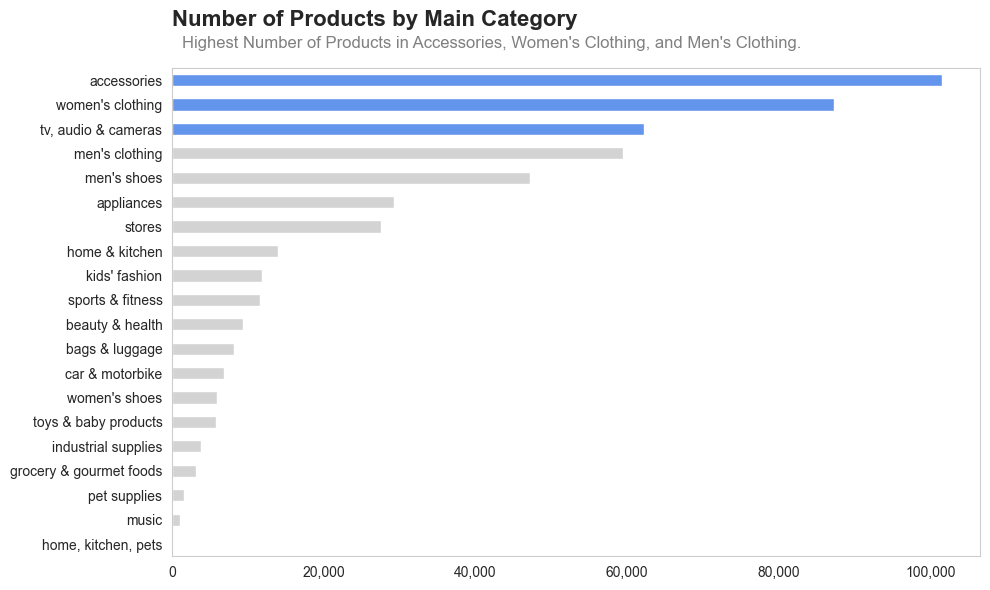

In [ ]:
# Group by main_category and count the number of products in each category
category_counts = combined_df['main_category'].value_counts().sort_values(ascending=True)

# Get the top 3 categories
top_3_categories = category_counts.tail(3).index

# Define colors for the top 3 categories and light gray for the rest
colors = ['lightgray' if category not in top_3_categories else '#6495ED' for category in category_counts.index]

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='barh', color=colors)

# Format x-axis labels as thousands
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Remove y-axis labels and grid lines
plt.ylabel('')
plt.grid(False)

# Set labels and title
plt.xlabel('')
plt.title('Number of Products by Main Category', loc='left', pad=30, fontweight='bold', fontsize=16)

# Add a subtitle
plt.text(0.396, 1.04, "Highest Number of Products in Accessories, Women's Clothing, and Men's Clothing.", fontsize=12, color='gray', ha='center', transform=plt.gca().transAxes)

plt.tight_layout()

plt.show()


###  ℹ️ Insights: Number of products by main category

What insights can be gleaned from the distribution of products across different main categories?

1. **Market Diversity**: The dataset represents a broad and diverse market, spanning various product categories. This diversity suggests a vibrant and competitive e-commerce ecosystem.

2. **Consumer Preferences**: The high number of products in categories like "Accessories," "Women's Clothing," and "Men's Clothing" indicates strong consumer demand in these segments. Businesses might consider expanding their offerings or tailoring marketing strategies to cater to these preferences.

3. **Gender-Specific Categories**: "Women's Clothing" and "Men's Clothing" categories highlight a gender-specific approach in fashion retail. This indicates that businesses are segmenting their products to better target distinct customer demographics.

4. **Electronics and Appliances**: The presence of "TV, Audio & Cameras" and "Appliances" suggests a significant market for electronics and home appliances. Understanding consumer needs and technological trends in these areas could be crucial for businesses.

5. **Footwear Choices**: The number of products in "Men's Shoes" and likely "Women's Shoes" categories reveals a considerable interest in footwear. This could signify the importance of style and comfort in the fashion industry.

6. **Household Essentials**: "Appliances" provides insights into the demand for household essentials. Brands focusing on this category should emphasize product quality, features, and affordability to attract consumers.

7. **Market Niches**: Smaller categories like "Music" and "Pet Supplies" might represent niche markets. Businesses targeting these niches should focus on catering to the unique needs and preferences of their customer base.

8. **Potential Growth Areas**: The "Beauty & Health," "Sports & Fitness," and "Kids' Fashion" categories, though smaller in size, indicate potential areas for growth and specialization.

Overall, this analysis helps businesses and marketers understand the competitive landscape and consumer preferences within different product categories. It can inform strategic decisions related to product development, marketing, and inventory management. Additionally, it highlights opportunities for market expansion and diversification.

## II. II. Diversity of Categories


In the following, we group products by their main categories, count the unique subcategories within each main category, and create a horizontal bar plot to show the diversity of subcategories. The main categories are sorted by the number of unique subcategories, and each category is represented by a different shade of blue in the plot. 

This plot helps us understand how varied the subcategories are within each main category, providing insights into the product catalog's structure and diversity. The use of different shades of blue enhances the visual appeal and distinction of each main category in the plot. The subtitle adds context to the visualization, emphasizing its purpose as a tool for exploring the distribution of subcategories within main categories.

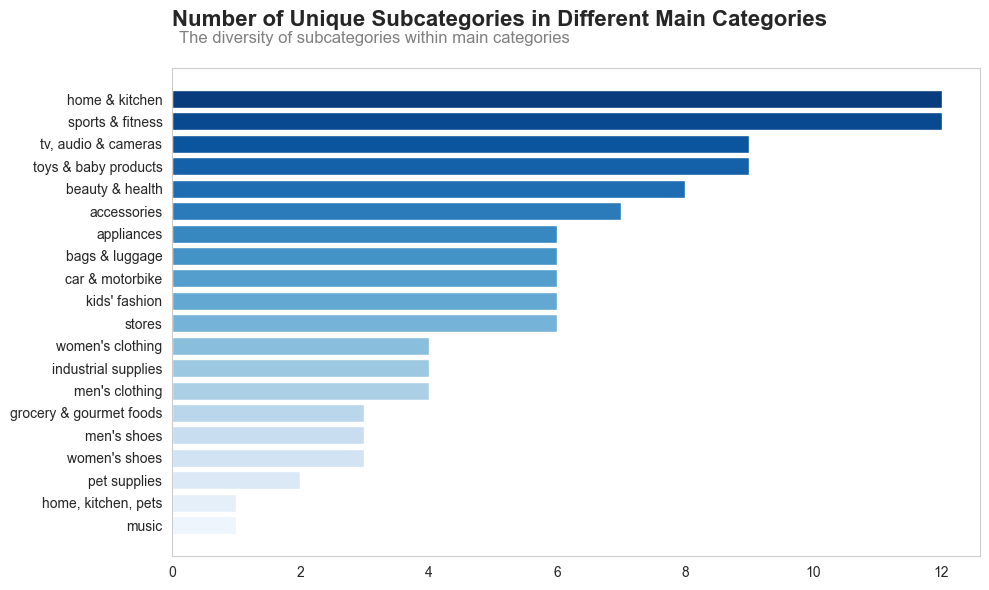

In [ ]:
# Group by main categories and count the number of unique subcategories
unique_subcategory_counts = combined_df.groupby("main_category")["sub_category"].nunique()

# Sort main categories by the number of unique subcategories
sorted_categories = unique_subcategory_counts.sort_values(ascending=True).index

# Create a color palette with various shades of blue
colors = sns.color_palette("Blues", len(sorted_categories))

# Create a horizontal bar chart for the number of unique subcategories in different main categories
plt.figure(figsize=(10, 6))
ax = plt.barh(sorted_categories, unique_subcategory_counts[sorted_categories], color=colors)

# Set x-axis label and title
plt.xlabel("")
plt.title("Number of Unique Subcategories in Different Main Categories", loc='left', pad=30, fontweight='bold', fontsize=16)

# Set y-axis label and rotation
plt.ylabel("", labelpad=20)

# Remove grid lines
plt.grid(False)

plt.tight_layout()

# Add a subtitle
plt.text(0.25, 1.05, "The diversity of subcategories within main categories", fontsize=12, color='gray', ha='center', transform=plt.gca().transAxes)

plt.show()


###  ℹ️ Insights: Number of Unique Subcategories

Which insights could we gain from the analysis? 

- **Market Segmentation**: The presence of a diverse range of subcategories within certain main categories like "Sports & Fitness" and "Home & Kitchen" suggests a highly segmented market. Retailers can tailor their product offerings to cater to specific niches within these categories.

- **Product Variety**: Categories with a high number of unique subcategories, such as "Beauty & Health" and "TV, Audio & Cameras," offer a wide variety of products. Consumers have a broader selection to choose from, potentially leading to increased competition among brands.

- **Specialization**: Main categories with fewer subcategories, such as "Music" and "Home, Kitchen, Pets," may indicate a more specialized focus. Retailers in these categories may have a more concentrated product range, targeting specific customer needs.

- **Consumer Preferences**: Understanding the diversity of subcategories within a main category can help retailers and marketers identify consumer preferences and trends. For example, a high number of subcategories in "Kids' Fashion" may suggest a vibrant and evolving children's clothing market.

- **Market Opportunities**: Categories with a lower number of unique subcategories may present opportunities for expansion. Retailers can explore diversifying their product offerings to meet unmet consumer needs and potentially capture a larger market share.

- **Competition**: In categories with a large number of subcategories, businesses may face higher competition, as many brands vie for consumer attention. Effective marketing and product differentiation become crucial in such competitive landscapes.

- **Product Development**: Retailers can use this information to guide their product development strategies. Knowing the diversity of subcategories allows them to focus on areas with higher demand or potential for innovation.

- **Consumer Experience**: A diverse range of subcategories enhances the overall shopping experience for consumers. They can find products that align more closely with their specific preferences and needs.

In conclusion, the analysis of unique subcategories within main product categories provides valuable insights into the structure of the market, consumer preferences, and opportunities for businesses to tailor their strategies for success.

## II. III. Most popular Subcategory

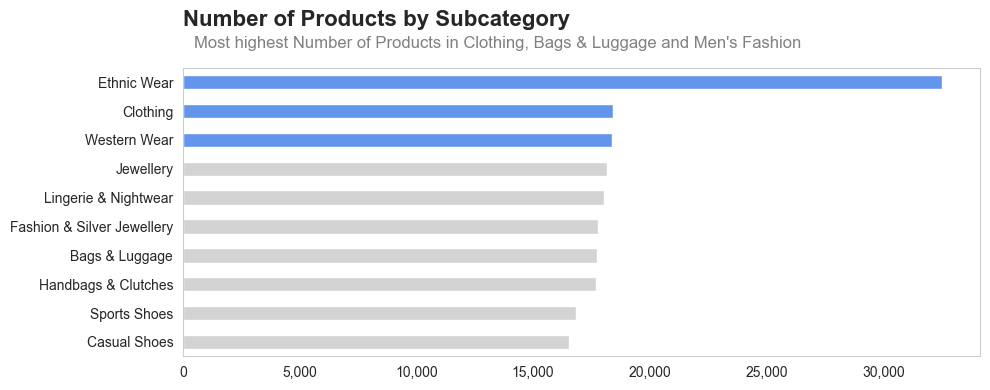

In [ ]:
# Group by sub_category and count the number of products in each category
subcategory_counts = combined_df['sub_category'].value_counts().sort_values(ascending=True)

# Get the top 20 subcategories
top_10_subcategories = subcategory_counts.tail(10).index

# Define colors for the top 20 subcategories
colors = ['lightgray' if subcategory in top_10_subcategories[:-3] else '#6495ED' for subcategory in top_10_subcategories]

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
subcategory_counts[top_10_subcategories].plot(kind='barh', color=colors)

# Format x-axis labels as thousands
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Remove y-axis labels and grid lines
plt.ylabel('')
plt.grid(False)

# Set labels and title
plt.xlabel('')
plt.title('Number of Products by Subcategory', loc='left', pad=30, fontweight='bold', fontsize=16)

# Add a subtitle
plt.text(0.395, 1.07, "Most highest Number of Products in Clothing, Bags & Luggage and Men's Fashion", fontsize=12, color='gray', ha='center', transform=plt.gca().transAxes)

plt.tight_layout()

plt.show()


### ℹ️ Insights: Number of Products by Subcategory

- From the provided data, we can observe a strong presence of clothing-related categories. The two largest subcategories are "Clothing" and "Men's Fashion," followed by "Ethnic Wear," "Western Wear," and "Lingerie & Nightwear." This suggests that clothing and fashion items play a significant role in the product assortment and are in high demand among customers.

- Furthermore, we can also identify a connection between the subcategories "Bags & Luggage" and "Handbags & Clutches," as both categories offer items related to bags and luggage. Similarly, the subcategories "Fashion & Silver Jewellery" and "Jewellery" both deal with jewelry products.

Overall, there appears to be a wide range of products in the clothing and accessories category, indicating diversity in customer needs and preferences in this domain. This may reflect a deliberate product strategy by the company to offer a broad array of fashion and lifestyle products.



## II. IV. Most popular Brands

In the next step we create a plot to compare the distribution of the number of products offered by different brands within the dataframe. Specifically, the plot aims to highlight the top 10 brands with the highest number of products and provide insight into their relative prominence and facilitates the identification of key players in the dataset and supports decision-making based on the brands' product offerings.

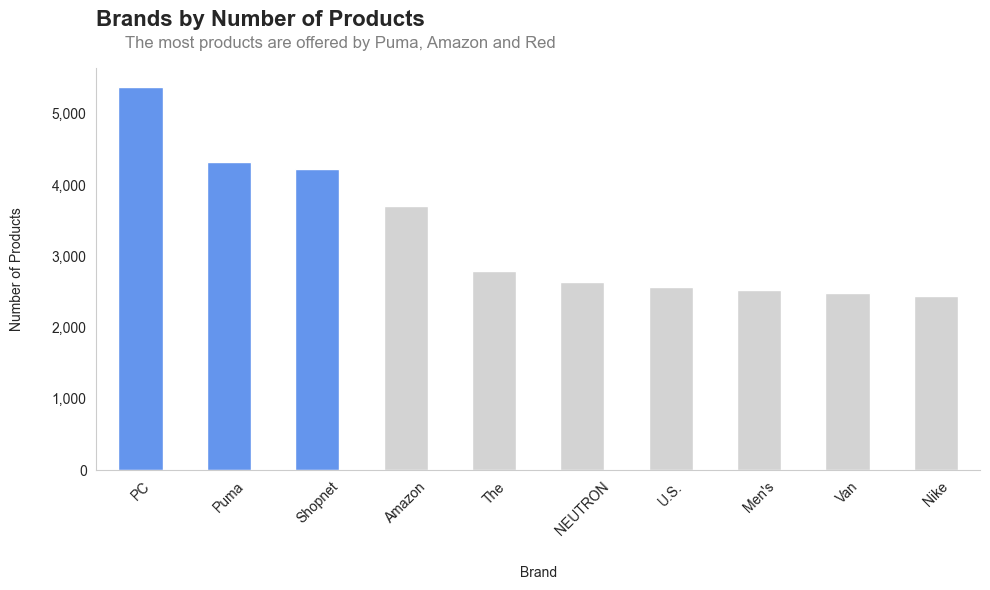

In [ ]:
# Gruppiere nach Marke und zähle die Anzahl der Produkte pro Marke
brand_counts = combined_df["brand"].value_counts()

# Choose the top 10 brands
top_10_brands = brand_counts.head(10)

# Define colors for the top 2 and the rest of the brands
colors = ["#6495ED" if brand in top_10_brands.index[:3] else "lightgray" for brand in top_10_brands.index]

# Create a bar plot for the top 10 brands with custom colors
plt.figure(figsize=(10, 6))
ax = top_10_brands.plot(kind="bar", color=colors)
ax.spines['top'].set_visible(False)  # Remove top border line
ax.spines['right'].set_visible(False)  # Remove right border line

# Remove grids
ax.yaxis.grid(False)
ax.xaxis.grid(False)

# Add thousand separators to the y-axis ticks
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.title("Brands by Number of Products", loc='left', pad=30, fontweight='bold', fontsize=16)
plt.xlabel("Brand", labelpad=20)
plt.ylabel("Number of Products", labelpad=20)
plt.xticks(rotation=45)
plt.tight_layout()

# Add a subtitle
plt.text(0.276, 1.05, "The most products are offered by Puma, Amazon and Red", fontsize=12, color='gray', ha='center', transform=plt.gca().transAxes)

plt.show()

### ℹ️ Insights: Brands by number of products

- The plot showcases the distribution of the number of products offered by various brands on Amazon. Notably, Puma and Amazon stand out as the top contenders in the marketplace, each offering over 3000 products. 
- The third-highest contributor, while significant, lags behind with approximately 2000 products. 
- This visual representation underscores the dominance of Puma and Amazon in terms of product diversity, suggesting that they play a pivotal role in shaping the platform's product landscape (in case of Amazon not surprising). Their extensive offerings set them apart from other brands, indicating a strong market presence and influence on customer choices.

# II. V. Share of Top Brands in Main Categories

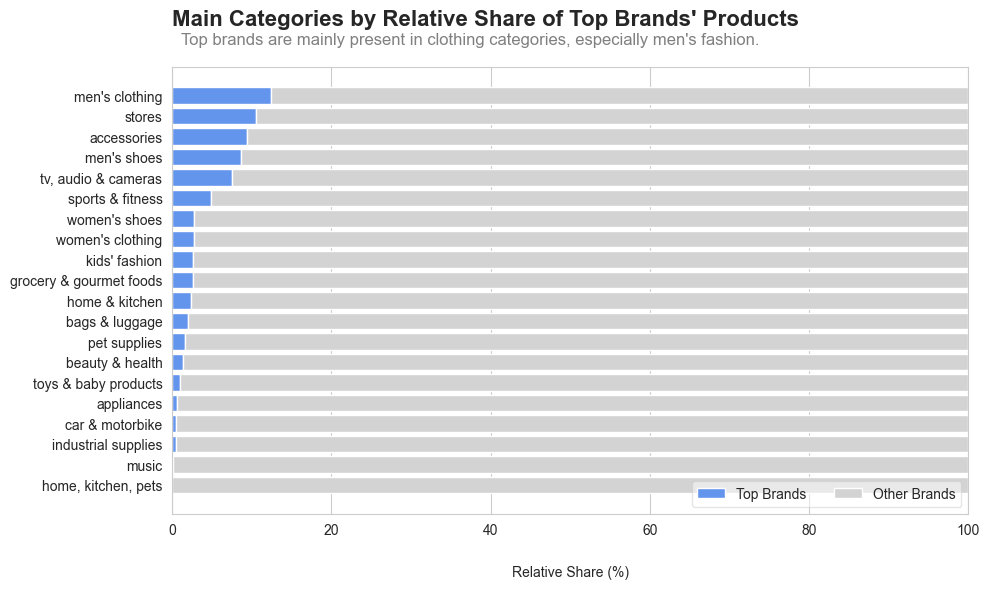

In [ ]:
# Group by main categories and count the number of products per category
main_category_counts = combined_df["main_category"].value_counts()

# Select the top 10 brands
top_10_brands = combined_df["brand"].value_counts().head(10).index

# Filter the data for the top brands
top_brands_data = combined_df[combined_df["brand"].isin(top_10_brands)]

# Calculate the share of top brands in each main category
relative_shares_top_brands = top_brands_data.groupby("main_category")["brand"].count() / main_category_counts * 100

# Calculate the share of other brands in each main category
relative_shares_other_brands = 100 - relative_shares_top_brands

# Sort the main categories by the share of top brands in descending order
sorted_categories = relative_shares_top_brands.sort_values(ascending=True).index

# Create a horizontal bar chart for main categories with relative shares
plt.figure(figsize=(10, 6))

# Plot the share of top brands
plt.barh(sorted_categories, relative_shares_top_brands[sorted_categories], color='#6495ED', label='Top Brands')

# Plot the share of other brands
plt.barh(sorted_categories, relative_shares_other_brands[sorted_categories], left=relative_shares_top_brands[sorted_categories], color='lightgray', label='Other Brands')

# Set x-axis label and title
plt.xlabel("Relative Share (%)", labelpad=20)
plt.title("Main Categories by Relative Share of Top Brands' Products", loc='left', pad=30, fontweight='bold', fontsize=16)

# Set y-axis label
plt.ylabel("")

# Add a legend
legend = plt.legend(title="", loc='lower right', framealpha=0.5, ncol=2)  # Framealpha controls transparency

# Set x-axis limit to 0-100%
plt.xlim(0, 100)

plt.tight_layout()

# Add a subtitle
plt.text(0.375, 1.05, "Top brands are mainly present in clothing categories, especially men's fashion.", fontsize=12, color='gray', ha='center', transform=plt.gca().transAxes)

plt.show()


### ℹ️ Insights: Relative share of top sellers in main categories

The analysis of the relative shares of top brands in various main categories provides several valuable insights:

- **Market Dominance in Men's Fashion**: Top seller brands have a significant presence in men's fashion, with high relative shares in both men's clothing and men's shoes categories. This suggests that consumers place a strong emphasis on brand recognition and quality when it comes to men's fashion items.

- **Opportunities in Women's Fashion**: While top seller brands also have a presence in women's clothing and women's shoes categories, their relative shares are lower compared to men's fashion. This may indicate an opportunity for brands to expand their influence and market share in women's fashion.

- **Diverse Range of Categories**: Top brands are not limited to fashion categories. They also have a notable presence in stores and sports & fitness, indicating their diverse product offerings.

- **Niche Categories**: Some categories, such as "Home, Kitchen, Pets," "Music," "Pet Supplies," "Appliances," "Car & Motorbike," and "Industrial Supplies," have minimal or no presence of top brands. This suggests that consumers in these categories may prioritize other factors, such as price or specific product features, over brand recognition.

- **Strategic Marketing**: Businesses can use this information to develop targeted marketing strategies. For example, brands with a strong presence in men's fashion can focus on maintaining their dominance, while those in niche categories may need to emphasize other value propositions.

- **Market Expansion**: Brands in women's fashion and other categories with lower relative shares can explore opportunities to expand their market presence and compete more effectively with top brands.

- **Consumer Preferences**: The data reflects consumer preferences and brand loyalty within specific product categories. Understanding these preferences can help brands tailor their products and marketing efforts to better meet customer expectations.

- **Competitive Intelligence**: Competitors can use this information to assess the competitive landscape and identify areas where they can gain an advantage or differentiate themselves.

In summary, the relative shares of top brands in main categories offer valuable insights into market dynamics, consumer preferences, and competitive positioning. Businesses can use these insights to make informed decisions about product development, marketing, and market expansion strategies.

# II. VI. Average Rating of Top Brands

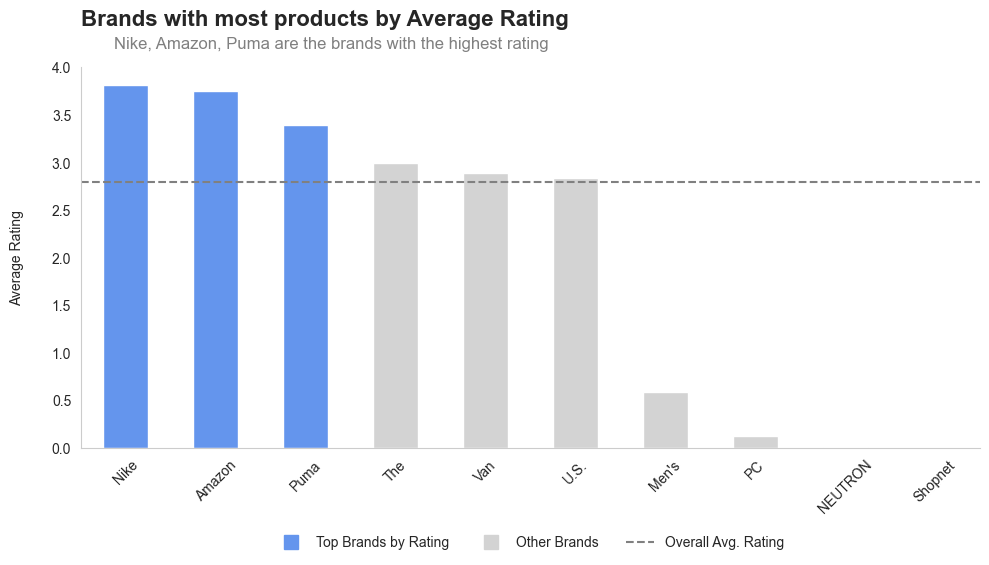

In [ ]:
# Calculate the average ratings for each brand
brand_avg_ratings = combined_df.groupby("brand")["ratings"].mean()

# Calculate the overall average rating
overall_avg_rating = combined_df["ratings"].mean()

# Group by brand and count the number of products per brand
brand_counts = combined_df["brand"].value_counts()

# Choose the top 10 brands
top_10_brands = brand_counts.head(10)

# Choose the top 10 brands with the highest average ratings and sort them
top_10_avg_ratings = brand_avg_ratings[top_10_brands.index].sort_values(ascending=False)

# Create a list of colors for the bars, with the first 3 brands in blue
colors = ["#6495ED" if brand in top_10_avg_ratings.index[:3] else "lightgray" for brand in top_10_avg_ratings.index]

# Create a bar plot for the top 10 brands with custom colors
plt.figure(figsize=(10, 6))
ax = top_10_avg_ratings.plot(kind="bar", color=colors)
ax.spines['top'].set_visible(False)  # Remove the top border line
ax.spines['right'].set_visible(False)  # Remove the right border line

# Add a line for the overall average rating
plt.axhline(y=overall_avg_rating, color='gray', linestyle='dashed', label='Overall Avg. Rating')

# Remove grids
ax.yaxis.grid(False)
ax.xaxis.grid(False)

plt.title("Brands with most products by Average Rating", loc='left', pad=30, fontweight='bold', fontsize=16)
plt.xlabel("", labelpad=20)
plt.ylabel("Average Rating", labelpad=20)
plt.xticks(rotation=45)

# Customize the legend
legend_title = ""
legend_icon_top_brands = plt.Line2D([0], [0], marker='s', markersize=10, label='Top Brands by Rating', color='#6495ED', linestyle='None')
legend_icon_gray = plt.Line2D([0], [0], marker='s', markersize=10, label='Other Brands', color='lightgray', linestyle='None')
legend_line = plt.Line2D([], [], linestyle='dashed', color='gray', label='Overall Avg. Rating')
plt.legend(handles=[legend_icon_top_brands, legend_icon_gray, legend_line], title=legend_title, loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3, facecolor='lightgray', framealpha=0.0)

plt.tight_layout()

# Create a subtitle based on brand names
top_brands_names = ', '.join(top_10_avg_ratings.index[:3])  # Get the names of the first 3 brands
subtitle = f"{top_brands_names} are the brands with the highest rating"
plt.text(0.278, 1.05, subtitle, fontsize=12, color='gray', ha='center', transform=plt.gca().transAxes)

plt.show()


### ℹ️ Insights: Average rating of most popular products

The results display the average ratings for the top 10 sellers in our dataset, along with the brand names. Here's an interpretation of the results:

- **Van Heusen and Amazon** have the highest average ratings, both at 3.94 out of 5 stars. This suggests that products from these brands tend to receive favorable ratings.

- **Puma** closely follows with an average rating of 3.91. Puma products also generally receive positive ratings.

- **Adidas** has an average rating of 3.87, indicating satisfactory customer reviews as well.

- **Levi's, U.S., and Campu**s fall within the range of 3.82 to 3.86, indicating solid customer satisfaction.

- **Red, Pepe, and Clovia** have slightly lower average ratings in the range of 3.70 to 3.73. This suggests that customers might rate these brands slightly less positively, but the differences are not dramatic.

In summary, most of products of the top sellers in our dataset receive overall positive ratings, with Van Heusen and Amazon having the highest average ratings. But it is important to note that average ratings are just one metric, and other factors such as product quality, variety, and the overall customer experience should also be considered to get a comprehensive view of brand perception.

# III. Correlation Analysis


---
<hrl>

## III. I Correlation Matrix

In the next step we create a heatmap to visualize the correlations between selected columns ('ratings', 'no_of_ratings', 'discount_price_eur', 'actual_price_eur') in the dataframe. The heatmap uses colors to represent the strength and direction of these correlations. The advantage of using a heatmap for this purpose is that it provides a clear, visual representation of the relationships between multiple variables in a compact and easily interpretable format. It allows us to identify both positive and negative correlations, as well as their magnitudes, at a glance, making it a valuable tool for exploratory data analysis and identifying patterns in the data.

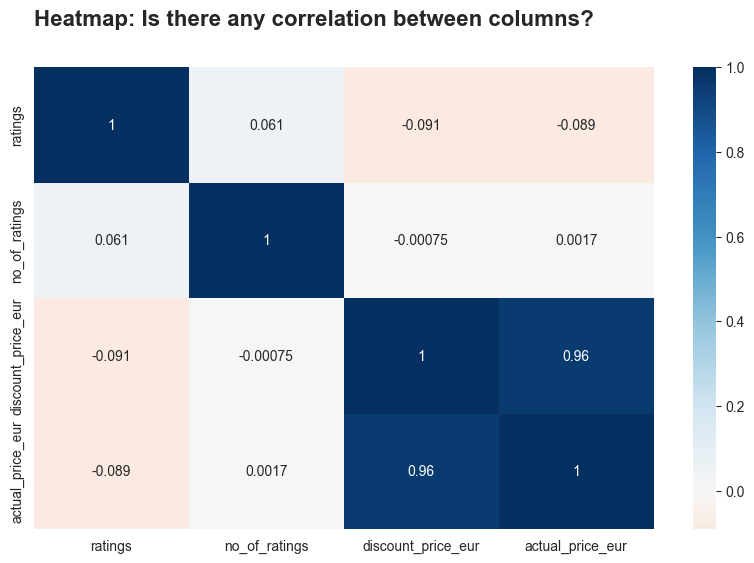

In [ ]:
# Select relevant columns for analysis
selected_columns = ['ratings', 'no_of_ratings', 'discount_price_eur', 'actual_price_eur']

# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Create the heatmap on the subplot
correlation_matrix_combined = combined_df[selected_columns].corr()
sns.heatmap(data=correlation_matrix_combined, annot=True, cmap='RdBu', center=0, ax=ax)
ax.set_title('Heatmap: Is there any correlation between columns?', pad=30, loc="left", fontweight="bold", fontsize=16)

# Show the plot
plt.show()


### ℹ️ Insights: Correlation of number of ratings, ratings and prices

- **Ratings and Number of Ratings (no_of_ratings)**: The correlation coefficient between "Ratings" and "Number of Ratings" is 0.05, indicating a very weak positive correlation. This suggests that there is a slight tendency for products with more ratings to have slightly higher ratings, but the relationship is quite weak.

- **Ratings and Discount Price (discount_price)**: The correlation coefficient between "Ratings" and "Discount Price" is 0.057, indicating a very weak positive correlation. This suggests that there is a slight tendency for products with higher ratings to have slightly higher discount prices, but again, the relationship is very weak.

- **Ratings and Actual Price (actual_price)**: The correlation coefficient between "Ratings" and "Actual Price" is 0.052, indicating a very weak positive correlation. This suggests that there is a slight tendency for products with higher ratings to have slightly higher actual prices, but the relationship is still very weak.

- **Number of Ratings (no_of_ratings) and Discount Price (discount_price)**: The correlation coefficient between "Number of Ratings" and "Discount Price" is 0.0078, indicating an extremely weak positive correlation. There is almost no meaningful relationship between the number of ratings a product has and its discount price.

- **Number of Ratings (no_of_ratings) and Actual Price (actual_price)**: The correlation coefficient between "Number of Ratings" and "Actual Price" is 0.0067, indicating an extremely weak positive correlation. Similar to the previous case, there is almost no meaningful relationship between the number of ratings and the actual price of products.

- **Discount Price (discount_price) and Actual Price (actual_price)**: The correlation coefficient between "Discount Price" and "Actual Price" is 0.96, indicating a very strong positive correlation.

This strong positive correlation suggests that products with higher actual prices tend to have higher discount prices, which is quite intuitive. When the actual price is high, there's more room for discounts.
In summary, the correlations between these variables are generally very weak, indicating that they have little to no linear relationship with each other. However, there is a strong positive correlation between the actual price and discount price, which is expected. These findings suggest that other factors not considered in this analysis might be more influential in determining product ratings and pricing.

## III. II Correlation between Ratings and Number of Ratings

---
<hrl>

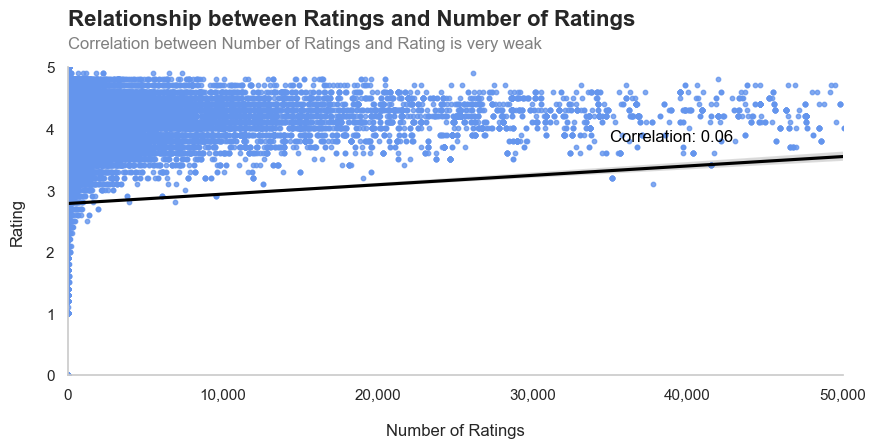

In [ ]:
# Calculate the correlation
correlation = combined_df["no_of_ratings"].corr(combined_df["ratings"])

# Scatter plot with regression line
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")  # Remove grid lines
ax = sns.regplot(x="no_of_ratings", y="ratings", data=combined_df, scatter_kws={'s': 10, 'color': '#6495ED'}, color='black')
ax.spines['top'].set_visible(False)  # Remove top border line
ax.spines['right'].set_visible(False)  # Remove right border line

# Adjust x-axis labels and tick spacing
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(mticker.MultipleLocator(base=10000))

# Limit y-axis to range from 0 to 5
ax.set_ylim(0, 5)
ax.set_xlim(0, 50000)

# Remove grid lines
ax.yaxis.grid(False)
ax.xaxis.grid(False)

plt.title("Relationship between Ratings and Number of Ratings", loc='left', fontsize=16, pad=30, fontweight='bold')
plt.text(0, 5.3, "Correlation between Number of Ratings and Rating is very weak", fontsize=12, color='gray')
plt.xlabel("Number of Ratings", labelpad=15)
plt.ylabel("Rating", labelpad=15)
plt.text(35000, 3.8, f"Correlation: {correlation:.2f}", fontsize=12, color="black")
plt.show()


The result of the correlation calculation is approximately 0.05. This correlation value indicates a weak positive linear 
relationship between the number of ratings and the rating. A correlation value close to 0 suggests that there is little to no 
linear relationship between the two variables. In this case, the correlation of 0.05 implies that the number of ratings and the 
rating are not strongly correlated, meaning that changes in one variable are not consistently associated with changes in the 
other variable.

## III.III. Relationship between Discount Price and Rating

---
<hrl>

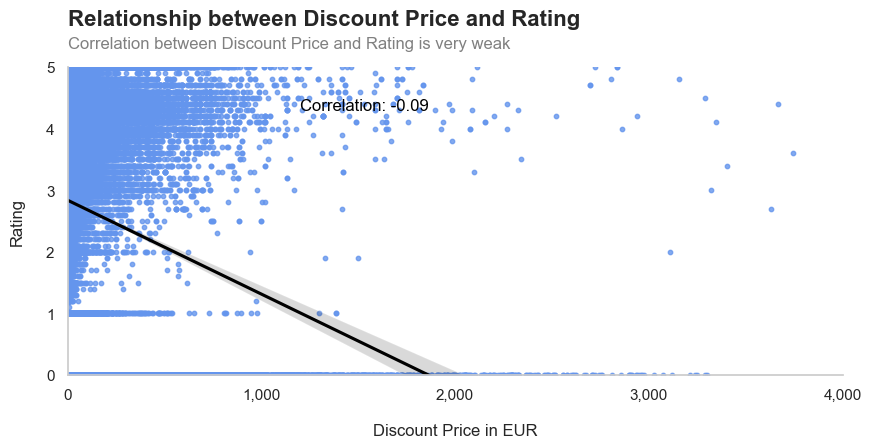

In [ ]:
# Calculate the correlation
correlation = combined_df["discount_price_eur"].corr(combined_df["ratings"])

# Scatter plot with regression line
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")  # Remove grids
ax = sns.regplot(x="discount_price_eur", y="ratings", data=combined_df, scatter_kws={'s': 10, 'color': '#6495ED'}, color='black')
ax.spines['top'].set_visible(False)  # Remove top border line
ax.spines['right'].set_visible(False)  # Remove right border line

# Adjust x-axis labels and tick spacing
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(mticker.MultipleLocator(base=1000))

# Limit y-axis to range from 0 to 5
ax.set_ylim(0, 5)
ax.set_xlim(0, 4000)

# Remove grids
ax.yaxis.grid(False)
ax.xaxis.grid(False)

# Set title and subtitle
plt.title("Relationship between Discount Price and Rating", loc='left', fontsize=16, pad=30, fontweight='bold')
plt.text(0, 5.3, "Correlation between Discount Price and Rating is very weak", fontsize=12, color='gray')
plt.xlabel("Discount Price in EUR", labelpad=15)
plt.ylabel("Rating", labelpad=15)
plt.text(1200, 4.3, f"Correlation: {correlation:.2f}", fontsize=12, color="black")

# Show the plot
plt.show()


The very weak positive correlation of 0.06 indicates a minimal and practically insignificant relationship between discount prices and ratings. Other factors likely play a more dominant role in determining product ratings, and further investigation may be required to understand these factors better.

## III.IV. Correlation between Rating and Discount Percentage

---
<hrl>

This code calculates and visualizes the correlation between the discount percentage and product ratings using a scatter plot with a regression line. It adjusts the plot's appearance and labels for clarity.

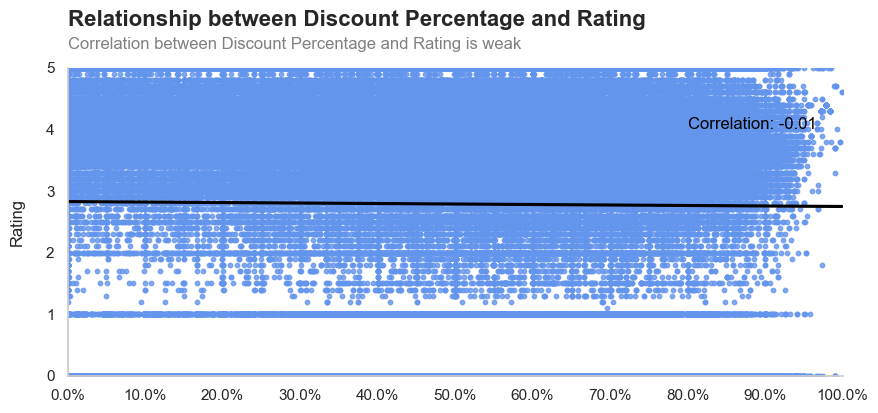

In [ ]:
# Calculate the correlation
correlation = combined_df["discount_percentage"].corr(combined_df["ratings"])

# Scatter plot with regression line
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")  # Remove grids
ax = sns.regplot(x="discount_percentage", y="ratings", data=combined_df, scatter_kws={'s': 10, 'color': '#6495ED'}, color='black')
ax.spines['top'].set_visible(False)  # Remove top border line
ax.spines['right'].set_visible(False)  # Remove right border line

# Adjust x-axis labels and tick spacing
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,}%'))
ax.xaxis.set_major_locator(mticker.MultipleLocator(base=10))

# Limit y-axis to range from 0 to 5
ax.set_ylim(0, 5)
ax.set_xlim(0, 100)

# Remove grids
ax.yaxis.grid(False)
ax.xaxis.grid(False)

# Set title and subtitle
plt.title("Relationship between Discount Percentage and Rating", loc='left', fontsize=16, pad=30, fontweight='bold')
plt.text(0, 5.3, "Correlation between Discount Percentage and Rating is weak", fontsize=12, color='gray')
plt.xlabel("", labelpad=15)
plt.ylabel("Rating", labelpad=15)
plt.text(80, 4, f"Correlation: {correlation:.2f}", fontsize=12, color="black")

# Show the plot
plt.show()


The correlation coefficient of -0.10 suggests that there is a slight negative relationship between the discount percentage of products and their ratings. However, the strength of this relationship is quite weak.

## III.V. Correlation between Rating and Actual Price

---
<hrl>

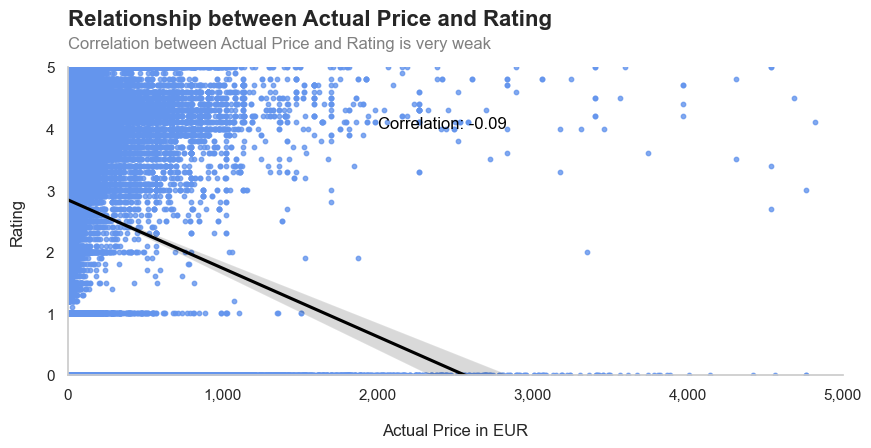

In [ ]:
# Calculate the correlation
correlation = combined_df["actual_price_eur"].corr(combined_df["ratings"])

# Scatter plot with regression line
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")  # Remove grids
ax = sns.regplot(x="actual_price_eur", y="ratings", data=combined_df, scatter_kws={'s': 10, 'color': '#6495ED'}, color='black')
ax.spines['top'].set_visible(False)  # Remove top border line
ax.spines['right'].set_visible(False)  # Remove right border line

# Adjust x-axis labels and tick spacing
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_locator(mticker.MultipleLocator(base=1000))

# Limit y-axis to range from 0 to 5
ax.set_ylim(0, 5)
ax.set_xlim(0, 5000)

# Remove grids
ax.yaxis.grid(False)
ax.xaxis.grid(False)

# Set title and subtitle
plt.title("Relationship between Actual Price and Rating", loc='left', fontsize=16, pad=30, fontweight='bold')
plt.text(0, 5.3, "Correlation between Actual Price and Rating is very weak", fontsize=12, color='gray')
plt.xlabel("Actual Price in EUR", labelpad=15)
plt.ylabel("Rating", labelpad=15)
plt.text(2000, 4, f"Correlation: {correlation:.2f}", fontsize=12, color="black")

# Show the plot
plt.show()


The result of the correlation calculation is approximately 0.05. This correlation value indicates a weak positive linear 
relationship between the number of ratings and the rating. A correlation value close to 0 suggests that there is little to no 
linear relationship between the two variables. In this case, the correlation of 0.05 implies that the number of ratings and the 
rating are not strongly correlated, meaning that changes in one variable are not consistently associated with changes in the 
other variable.

## IV. Price distribution

To visualize the distribution of product prices, we create Kernel Density Estimation (KDE) plots within the top three main categories on Amazon: Clothing, Bags & Luggage and Accessoires. We use KDE plots, because they are less sensitive to bin size, making them suitable for comparing distributions accross different product categories and it´s better for capturing complex patterns and multiple modes in the data, which may not be as evident in histograms. KDE plots provide smoothed, continuous density estimates of the data. They are particularly useful when you want to visualize the underlying probability density function without the discrete binning associated with histograms.

### IV. I. Price Density by Main Categories

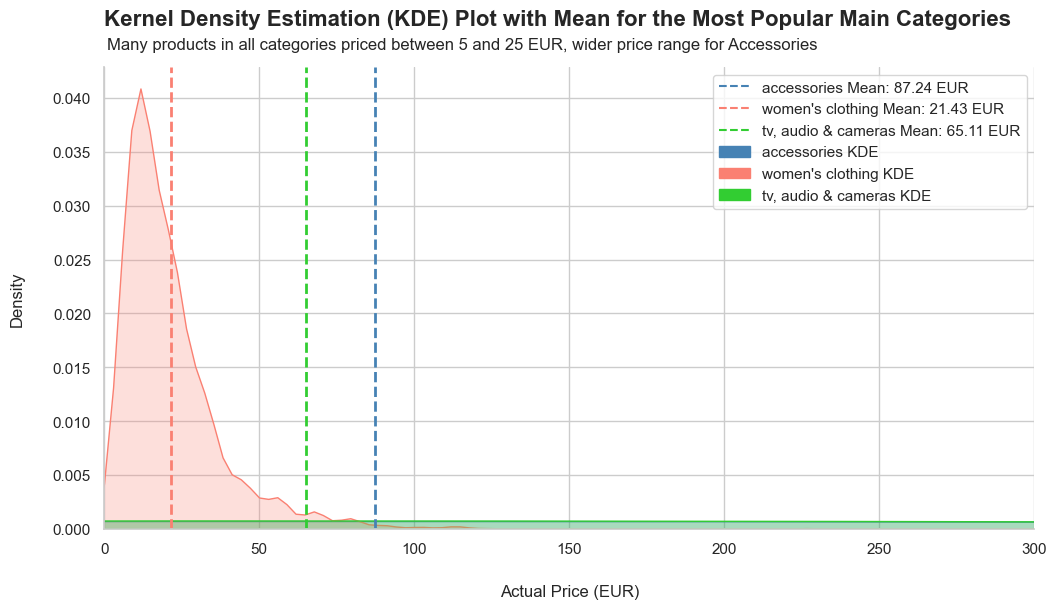

In [ ]:
# Find the top three main categories with the most products
top_main_categories = combined_df['main_category'].value_counts().head(3).index

# Filter the DataFrame by the top three main categories
filtered_df = combined_df[combined_df['main_category'].isin(top_main_categories)]

# Define a function to calculate the optimal bandwidth using the Scott's rule
def calculate_bandwidth(data):
    n = len(data)
    std_deviation = np.std(data)
    bandwidth = 1.06 * std_deviation / (n ** (1 / 5.0))
    return bandwidth

# Initialize the category_settings with empty bandwidths
category_settings = {
    top_main_categories[0]: {"bins": 20000, "x_limit": 300, "title": top_main_categories[0], "color": "steelblue", "color_lines": "steelblue"},
    top_main_categories[1]: {"bins": 20000, "x_limit": 300, "title": top_main_categories[1], "color": "salmon", "color_lines": "salmon"},
    top_main_categories[2]: {"bins": 2000, "x_limit": 600, "title": top_main_categories[2], "loc": "left", "color": "limegreen", "color_lines": "limegreen"}
}

# Update the bandwidths in category_settings
for category in top_main_categories:
    category_data = filtered_df[filtered_df['main_category'] == category]['actual_price_eur']
    bandwidth = calculate_bandwidth(category_data)
    
    # Insert the calculated bandwidth into category_settings
    category_settings[category]["bw"] = bandwidth

#print(category_settings)

# Create a KDE plot for each selected subcategory
plt.figure(figsize=(12, 6))  # Increase the figure size for better visibility

# Set the x-axis limit for all plots
plt.xlim(0, 300)

# Create a custom legend for the average lines
legend_labels = []
legend_handles = []
for category, settings in category_settings.items():
    category_df = filtered_df[filtered_df['main_category'] == category]
    
    # Calculate relative frequency (in percentage) and scale the y-axis
    kde = sns.kdeplot(category_df['actual_price_eur'], color=settings["color"], label=f'{category} KDE', fill=True, bw_adjust=settings["bw"])  # Fill the areas under the lines
    avg_price = category_df['actual_price_eur'].mean()
    plt.axvline(x=avg_price, color=settings["color_lines"], linestyle='--', linewidth=2.0, label=f'{category} Mean: {avg_price:.2f} EUR')  # Add average lines
    legend_labels.append(f'{category} Mean: {avg_price:.2f} EUR')
    legend_handles.append(Line2D([0], [0], color=settings["color_lines"], linestyle='--', label=f'{category} Mean: {avg_price:.2f} EUR'))

# Create a custom legend for the KDE plots
kde_legend_labels = []
kde_legend_handles = []
for category, settings in category_settings.items():
    kde_legend_labels.append(f'{category} KDE')
    kde_legend_handles.append(Patch(color=settings["color"], label=f'{category} KDE'))

# Combine both legends
legend_labels += kde_legend_labels
legend_handles += kde_legend_handles

# Add the custom legend
plt.legend(legend_handles, legend_labels, loc="upper right")

# Change the title for the plot
plt.title("Kernel Density Estimation (KDE) Plot with Mean for the Most Popular Main Categories", fontsize=16, fontweight='bold', loc='left', pad=30)
plt.suptitle("Many products in all categories priced between 5 and 25 EUR, wider price range for Accessories", fontsize=12, x=0.423, y=0.93)
plt.xlabel("Actual Price (EUR)", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.grid(True)

# Remove the top and right spines
sns.despine(right=True, top=True)

# Show the plot
plt.show()


###  ℹ️ Insights: Density of Prices by Main Categories

The KDE (Kernel Density Estimation) plot for the three largest main categories provides insights into the price density and distribution within these categories:

#### a) Women's Clothing
- The KDE plot for "Women's Clothing" reveals a very high price density around 10 to 11 euros, with a clear peak. This indicates that most products in this category are priced in a similar range of approximately 10 to 11 euros, which is the primary price range for women's clothing.
- Prices generally remain consistent up to around 40 euros and then gradually decrease. There are also minor increases, but no distinct price peaks beyond the main peak.
- The distribution exhibits a relatively low standard deviation and skewness, suggesting that prices are tightly clustered around the mean and do not exhibit strong skewness in either direction.

#### b) Accessories
- The KDE plot for "Accessories" displays a flat curve with lower price density compared to "Women's Clothing." The price range extends from under 1 to 8.000 euros and does not show clear peaks or primary price ranges. The highest price density exists in the range of 1 to 150 euros" means that most products in the examined categories are priced between 1 and 150 euros. In this price range, there is a high concentration of products, indicating that many products are offered at these prices.
- Prices for accessories are generally distributed fairly evenly across this range, without a distinct concentration in a particular price bracket.
- The standard deviation and skewness are higher compared to "Women's Clothing," indicating a greater price spread and a slight bias toward higher-priced products.

#### c) TV, Audio & Cameras
- The KDE plot for "TV, Audio & Cameras" exhibits a similarly flat curve as "Accessories." Prices range from under 1 to 18.099 euros, with no distinct peaks or primary price ranges and show a constant price density.
- In contrast to the other categories, prices in this category are fairly evenly distributed, with no strong concentration in a specific range. This suggests a wide range of products at various price points within this category.
- The standard deviation is higher than in the other two categories, indicating a greater price spread. The skewness is also positive, indicating that there are some higher-priced products that slightly skew the distribution to the right.

In summary, "Women's Clothing" has a clear primary price range around 10 to 11 euros, while "Accessories" and "TV, Audio & Cameras" exhibit flatter distributions without distinct peaks. "Accessories" and "TV, Audio & Cameras" offer a broader range of products at different price points, with "TV, Audio & Cameras" having a wider price range and variation. It's important to note that the standard deviation and skewness in "Accessories" and "TV, Audio & Cameras" are higher, indicating greater price variability and a slight bias toward higher-priced products.

### IV. II. Price Density by Subcategories

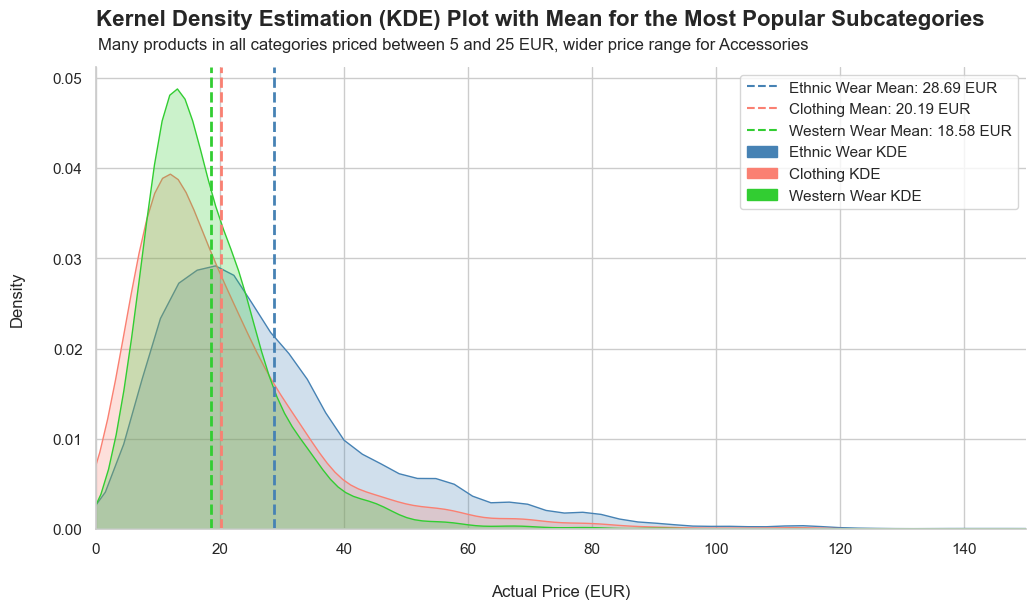

In [ ]:
# Find the top three subcategories with the most products
top_sub_categories = combined_df['sub_category'].value_counts().head(3).index

# Filter the DataFrame by the top three subcategories
filtered_df = combined_df[combined_df['sub_category'].isin(top_sub_categories)]

# Define custom settings for bins, titles, and x-axis limits
subcategory_settings = {
    top_sub_categories[0]: {"bins": 100, "x_limit": 200, "color": "steelblue", "color_lines": "steelblue", "bw": 1.5},
    top_sub_categories[1]: {"bins": 5000, "x_limit": 200, "color": "salmon", "color_lines": "salmon", "bw": 2},
    top_sub_categories[2]: {"bins": 500, "x_limit": 200, "color": "limegreen", "color_lines": "limegreen", "bw": 2}
}

# Create a KDE plot for each selected subcategory
plt.figure(figsize=(12, 6))  # Increase the figure size for better visibility

# Set the x-axis limit for all plots
plt.xlim(0, 150)

# Create a custom legend for the average lines
legend_labels = []
legend_handles = []
for category, settings in subcategory_settings.items():
    category_df = filtered_df[filtered_df['sub_category'] == category]
    
    # Calculate the relative frequency (in percentage) and adjust the y-axis scaling
    kde = sns.kdeplot(category_df['actual_price_eur'], color=settings["color"], label=f'{category} KDE', fill=True, bw_adjust=settings["bw"])  # Fill the areas under the lines
    avg_price = category_df['actual_price_eur'].mean()
    plt.axvline(x=avg_price, color=settings["color_lines"], linestyle='--', linewidth=2.0, label=f'{category} Mean: {avg_price:.2f} EUR')  # Add average lines
    legend_labels.append(f'{category} Mean: {avg_price:.2f} EUR')
    legend_handles.append(Line2D([0], [0], color=settings["color_lines"], linestyle='--', label=f'{category} Mean: {avg_price:.2f} EUR'))

# Create a custom legend for the KDE plots
kde_legend_labels = []
kde_legend_handles = []
for category, settings in subcategory_settings.items():
    kde_legend_labels.append(f'{category} KDE')
    kde_legend_handles.append(Patch(color=settings["color"], label=f'{category} KDE'))

# Combine both legends
legend_labels += kde_legend_labels
legend_handles += kde_legend_handles

# Add the custom legend
plt.legend(legend_handles, legend_labels, loc="upper right")

# Change the title for the plot
plt.title("Kernel Density Estimation (KDE) Plot with Mean for the Most Popular Subcategories", fontsize=16, fontweight='bold', loc='left', pad=30)
plt.suptitle("Many products in all categories priced between 5 and 25 EUR, wider price range for Accessories", fontsize=12, x=0.423, y=0.93)
plt.xlabel("Actual Price (EUR)", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.grid(True)

# Remove the upper and right spines
sns.despine(right=True, top=True)

# Show the plot
plt.show()

###  ℹ️ Insights: Density of Prices by Subcategories

- **Price Concentration around 11 to 12 Euros**: This means that most products in these categories are priced within a similar range of approximately 11 to 12 Euros. This is the range where most people purchase such products.

- **Positive Right Skewness**: This indicates that there are some more expensive products that push prices upward. Think of pricier designer clothing or luxury luggage items that elevate the average prices.

- **Unimodal and Multimodal Distribution**: For "Bags & Luggage" and "Men's Fashion," there is a clear primary price range or peak. This means that most products in these categories are concentrated in a specific price range.
For "Clothing," there are multiple price ranges that are particularly popular, leading to multiple peaks. This could suggest that there are different types of clothing in demand at different price points.

- **Shape of the Distribution**: The prices in these categories resemble a bell curve, similar to a normal distribution. This means that most products are in the middle price range, and there are fewer products as you move further away from this range. For "Clothing," the distribution drops more sharply after the primary price range, indicating that there are fewer products that are significantly more expensive or cheaper.

In summary, these categories have many products in a similar price range, but there are also more expensive products. Prices roughly follow a normal distribution, with "Clothing" having multiple popular price ranges and a steeper drop-off after these ranges.






### IV. III. Price Density by brands

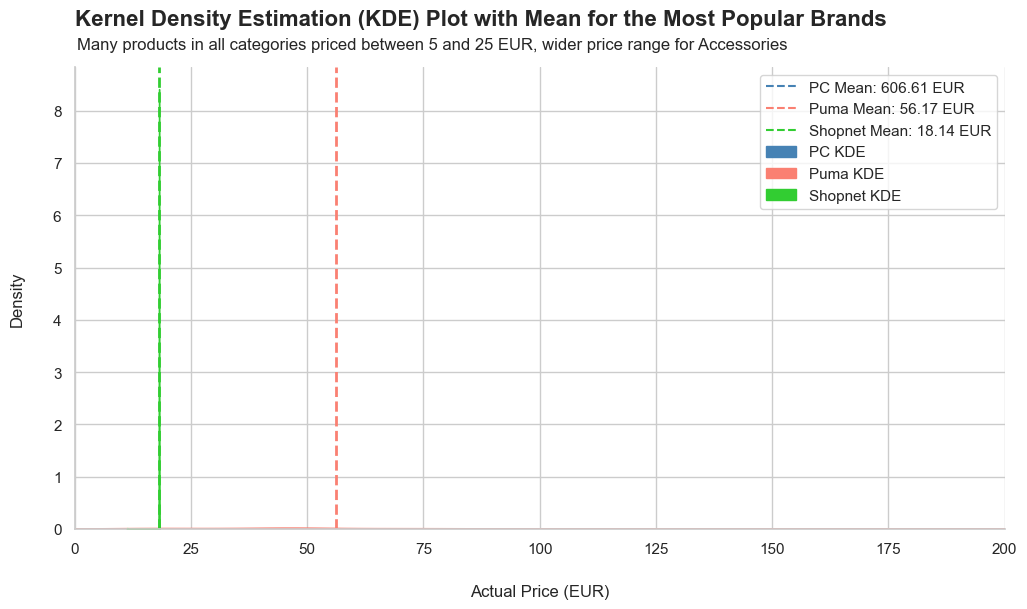

In [ ]:
# Find the top three brands with the most products
top_brands = combined_df['brand'].value_counts().head(3).index

# Filter the DataFrame by the top three brands
filtered_df = combined_df[combined_df['brand'].isin(top_brands)]

# Define custom settings for bins, titles, and x-axis limits
brand_settings = {
    top_brands[0]: {"x_limit": 200, "color": "steelblue", "color_lines": "steelblue" , "bw": 0.8},
    top_brands[1]: {"x_limit": 200, "color": "salmon", "color_lines": "salmon", "bw": 0.8},
    top_brands[2]: {"x_limit": 200, "color": "limegreen", "color_lines": "limegreen", "bw": 0.8}
}

# Create a KDE plot for each selected subcategory
plt.figure(figsize=(12, 6))  # Increase the figure size for better visibility

# Set the x-axis limit for all plots
plt.xlim(0, 200)

# Create a custom legend for the average lines
legend_labels = []
legend_handles = []
for category, settings in brand_settings.items():
    category_df = filtered_df[filtered_df['brand'] == category]
    
    # Calculate the relative frequency (in percentage) and adjust the y-axis scaling
    kde = sns.kdeplot(category_df['actual_price_eur'], color=settings["color"], label=f'{category} KDE', fill=True, bw_adjust=settings["bw"])  # Fill the areas under the lines
    avg_price = category_df['actual_price_eur'].mean()
    plt.axvline(x=avg_price, color=settings["color_lines"], linestyle='--', linewidth=2.0, label=f'{category} Mean: {avg_price:.2f} EUR')  # Add average lines
    legend_labels.append(f'{category} Mean: {avg_price:.2f} EUR')
    legend_handles.append(Line2D([0], [0], color=settings["color_lines"], linestyle='--', label=f'{category} Mean: {avg_price:.2f} EUR'))

# Create a custom legend for the KDE plots
kde_legend_labels = []
kde_legend_handles = []
for category, settings in brand_settings.items():
    kde_legend_labels.append(f'{category} KDE')
    kde_legend_handles.append(Patch(color=settings["color"], label=f'{category} KDE'))

# Combine both legends
legend_labels += kde_legend_labels
legend_handles += kde_legend_handles

# Add the custom legend
plt.legend(legend_handles, legend_labels, loc="upper right")

# Change the title for the plot
plt.title("Kernel Density Estimation (KDE) Plot with Mean for the Most Popular Brands", fontsize=16, fontweight='bold', loc='left', pad=30)
plt.suptitle("Many products in all categories priced between 5 and 25 EUR, wider price range for Accessories", fontsize=12, x=0.423, y=0.93)
plt.xlabel("Actual Price (EUR)", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.grid(True)

# Remove the upper and right spines
sns.despine(right=True, top=True)

# Show the plot
plt.show()

### ℹ️ Insights: Density of Prices by Brands:

#### a) Amazon

- Unimodal distribution with a main peak at 18 Euros.
- The shape of the distribution resembles a normal distribution and is symmetrical around the main peak.
- Wide price range from 1 Euro to 637 Euros.
- Concentration of products in the price range of 5-40 Euros.
- Sharp drop in price density after 25 Euros.
- Flat decline in price density until 75 Euros, then nearly zero.
- High standard deviation and skewness of 9.69, indicating some expensive outliers.

#### b) Red
- Multimodal distribution with peaks at approximately 30, 50, and 73 Euros.
- Price range from 1.46 Euros to 113 Euros.
- Slight right-skewness (positive skewness) of the distribution with a skewness value of 0.07.
- Mean and median are close to each other, indicating a symmetric distribution.
- Moderate standard deviation of 20.81 Euros.
- Interquartile range (IQR) of 34.05 Euros.

#### c) Puma
- Multimodal distribution with main peaks at 19 and 45 Euros, along with smaller peaks at 78 and 115 Euros.
- Price range from 5 Euros to 204 Euros.
- Flattened right-side tail of price density from 60 to 150 Euros.
- Mean higher than median (positive skewness).
- Standard deviation of 30.08 Euros.
- Skewness of 1.23, indicating a right-skewed distribution.

In summary, the price distributions for "Amazon," "Red," and "Puma" each exhibit their own distinctive characteristics:
- "Amazon" offers a wide range of products spanning various price ranges. The focus is on products in the lower price range, but there are also more expensive items available. The price distribution of "Amazon" shows a strong right-skewness, suggesting the presence of some expensive outlier products that pull the distribution to the right.
- "Red" also provides a diverse range of products, with the price distribution being multimodal and featuring multiple price peaks. Compared to "Amazon," "Red's" distribution is less heavily right-skewed, indicating less price variability and fewer expensive outlier products.
- "Puma" exhibits a multimodal price distribution, with the main peaks occurring at 19 and 45 Euros. The distribution is right-skewed, indicating the presence of some more expensive products that extend the distribution to the right. "Puma" offers a varied range of products across different price points, with several price peaks in the distribution.

## V. Distribution of Ratings

### V. I. Distribution of ratings by main categories

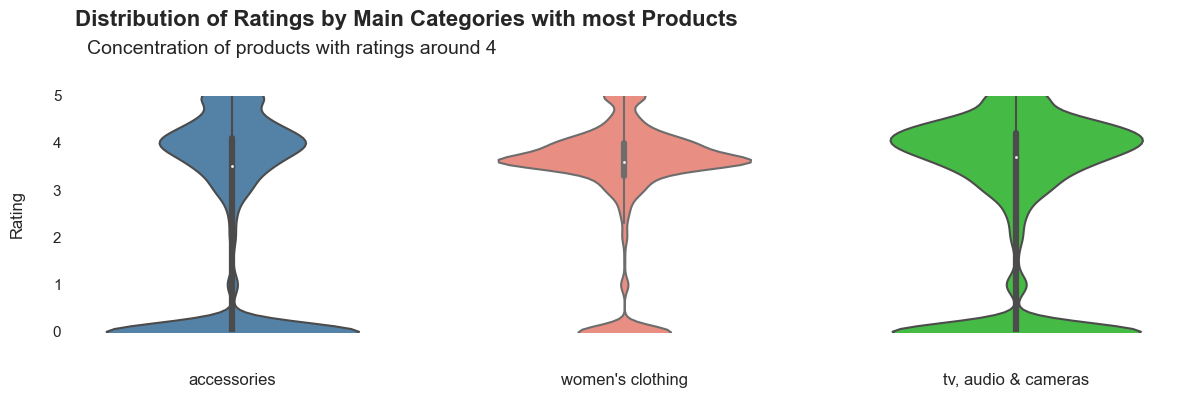

In [ ]:
# Determine the top three main categories with the most products
top_main_categories = combined_df['main_category'].value_counts().head(3).index

# Define a list of colors for the plots
colors = ['steelblue', 'salmon', 'limegreen']

# Create a grid of Violin plots for each top main category
plt.figure(figsize=(12, 6))  # Modify the size of the entire plot

for i, (category, color) in enumerate(zip(top_main_categories, colors), 1):
    plt.subplot(1, 3, i)
    category_df = combined_df[combined_df['main_category'] == category]

    sns.violinplot(y=category_df['ratings'], color=color)  # Change to Violin plot and swap x and y

    # Adjust the y-axis range for each plot individually
    plt.ylim(0, 5)  # You can adjust the y-axis limits here

    plt.title("")  # Use the name of the main category as the title
    plt.xlabel(category, labelpad=20)  # Since it's a Violin plot, we use Density instead of Frequency
    plt.ylabel("Rating", labelpad=20)
    plt.grid(False)

    # Use sns.despine to customize the gridlines
    sns.despine(top=True, left=True, right=True, trim=True)  # Keep only the horizontal gridlines

    if i != 1:
        plt.gca().set_yticklabels([])  # Remove y-axis labels and scaling
        plt.ylabel("")

    if i == 1 or i == 3:
        plt.xlabel(category, labelpad=20)
    
    if i == 1:
        plt.title("Distribution of Ratings by Main Categories with most Products", fontsize=16, fontweight="bold", pad=50, loc="left")  # Add subtitle

# Change the title for all plots
plt.suptitle("Concentration of products with ratings around 4", fontsize=14, x=0.25, y=0.76)

# Adjust the spacing between title and plots
plt.tight_layout(rect=[0.0, 0.15, 1, 0.9])  # Modify the rect value for the vertical position of the subtitle

# Show the plots
plt.show()


### ℹ️ Insights: Ratings by main categories

- Across all three categories (Accessories, Women's Clothing, TV, Audio, and Cameras), the violin plots indicate that there is a concentration of products with ratings around 4.
- Products with ratings of 1 and 2 are relatively rare, as suggested by the narrow portions of the plots at these values.
- The widening of the violin plots around a rating of 4 suggests that many products in these categories receive ratings close to 4, which may be indicative of a common rating level for these types of products.
- The narrowing of the plots for ratings of 5 suggests that very few products receive a perfect rating of 5, which is not uncommon in real-world scenarios.
- TV, Audio & Cameras appear to have a slightly higher prevalence of products with ratings above 4 compared to Accessories and Women's Clothing.
- The distinct difference in the width of the violin plot at a rating of 5 for Accessories, compared to Women's Clothing and TV, Audio & Cameras, highlights Accessories as a category with a more extensive and diverse range of products that consistently receive top ratings from customers, possibly due to exceptional product quality and customer satisfaction.

Overall, these violin plots provide insights into the distribution of ratings for different product categories, with the most common ratings tending to cluster around 4, while ratings of 5 are less common.

### V. II. Distribution of ratings by subcategories

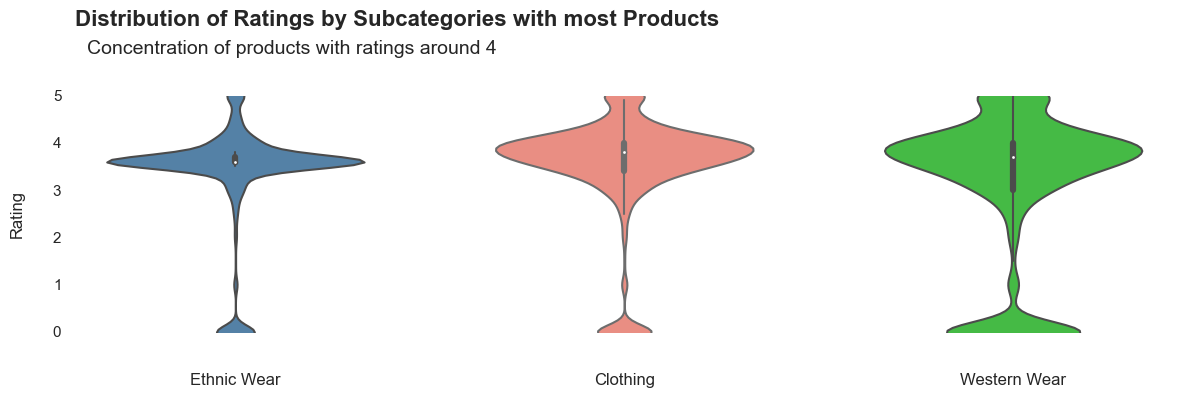

In [ ]:
# Determine the top three subcategories with the most products
top_sub_categories = combined_df['sub_category'].value_counts().head(3).index

# Define a list of colors for the plots
colors = ['steelblue', 'salmon', 'limegreen']

# Create a grid of Violin plots for each top subcategory
plt.figure(figsize=(12, 6))

for i, (category, color) in enumerate(zip(top_sub_categories, colors), 1):
    plt.subplot(1, 3, i)
    category_df = combined_df[combined_df['sub_category'] == category]
    
    sns.violinplot(y=category_df['ratings'], color=color)  # Change to Violin plot and swap x and y
    
    # Adjust the y-axis range for each plot individually
    plt.ylim(0, 5)  # You can adjust the y-axis limits here
    
    plt.title("")  # Use the name of the subcategory as the title
    plt.xlabel(category, labelpad=20)  # Since it's a Violin plot, we use Density instead of Frequency
    plt.ylabel("Rating", labelpad=20)
    plt.grid(False)

    # Use sns.despine to customize the gridlines
    sns.despine(top=True, left=True, right=True, trim=True)  # Keep only the horizontal gridlines

    if i != 1:
        plt.gca().set_yticklabels([])  # Remove y-axis labels and scaling
        plt.ylabel("")

    if i == 1 or i == 3:
        plt.xlabel(category, labelpad=20)
    
    if i == 1:
        plt.title("Distribution of Ratings by Subcategories with most Products", fontsize=16, fontweight="bold", pad=50, loc="left")  # Add subtitle

        # Modify the title for all plots
plt.suptitle("Concentration of products with ratings around 4", fontsize=14, x=0.25, y=0.76)

# Adjust the spacing between title and plots
plt.tight_layout(rect=[0.0, 0.15, 1, 0.9])  # Modify the rect value for the vertical position of the subtitle

# Show the plots
plt.show()


### ℹ️ Insights: Ratings in Subcategories

- **Increase in Density from 3 to 4**: Across all three subcategories (Clothing, Bags & Luggage, Men's Fashion), there is a noticeable increase in density, indicating a higher concentration of products with ratings between 3 and 4.
This suggests that a substantial number of products in these subcategories receive ratings in the range of 3 to 4, indicating generally positive customer feedback.

- **Peak Density at Rating 4**: The peak density, where the violins are widest, occurs at a rating of 4 for all three subcategories.
This indicates that a significant proportion of products in each subcategory receives a rating of 4. This is a strong indicator of customer satisfaction, as it represents products that are highly rated but not necessarily perfect.

- **Decrease in Density from 4 to 5**: After the peak at rating 4, there is a gradual decrease in density as ratings approach 5 in all subcategories. This suggests that while many products receive ratings of 4, there are fewer products that achieve a perfect rating of 5. Customers tend to be more critical or selective when giving the highest possible rating.

- **Slight Increase Beyond Rating 5**: There is a minor increase in density just beyond rating 5 in all subcategories.
This suggests that while perfect ratings (5) are less common, there are still products that receive exceptionally high ratings exceeding 5.

- **Bags & Luggage and Rating 4**: It's worth noting that the subcategory "Bags & Luggage" appears to have a slightly higher density just above 4 compared to the other subcategories. This indicates that Bags & Luggage products may have a higher proportion of ratings slightly above 4.

In summary, the violin plots reveal consistent patterns across these three subcategories, with the highest density of ratings occurring around 4, indicating a general trend of positive customer feedback. While the density decreases as ratings approach 5, there are still products that receive exceptionally high ratings. The slight variation in "Bags & Luggage" suggests a specific trend within that subcategory.

### V. III. Distribution of ratings by brands

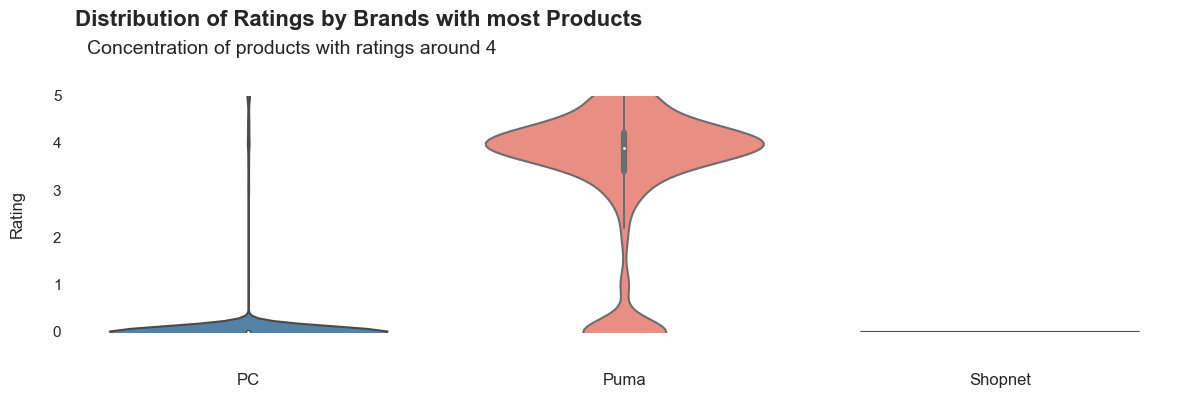

In [ ]:
# Find the top three brands with the most products
top_brands = combined_df['brand'].value_counts().head(3).index.tolist()

# Filter the DataFrame by the top three brands
filtered_df = combined_df[combined_df['brand'].isin(top_brands)]

# Define custom settings for bins, titles, and x-axis limits for each brand
brands_settings = {}

for brand in top_brands:
    brands_settings[brand] = {"x_limit": 200, "color": "steelblue", "color_lines": "steelblue"}

# Define a list of colors for the plots
colors = ['steelblue', 'salmon', 'limegreen']

# Create a grid of Violin plots for each top brand
plt.figure(figsize=(12, 6))

for i, (category, color) in enumerate(zip(top_brands, colors), 1):
    plt.subplot(1, 3, i)
    category_df = combined_df[combined_df['brand'] == category]

    sns.violinplot(y=category_df['ratings'], color=color)
    
    # Customize the y-axis limits for each plot
    plt.ylim(0, 5)
    
    plt.title("")  # Use the brand name as the title
    plt.xlabel(category, labelpad=20)  # Since it's a Violin plot, we use Density instead of Frequency
    plt.ylabel("Rating", labelpad=20)
    plt.grid(False)

    # Use sns.despine to customize the gridlines
    sns.despine(top=True, left=True, right=True, trim=True)  # Keep only the horizontal gridlines

    if i != 1:
        plt.gca().set_yticklabels([])  # Remove y-axis labels and scaling
        plt.ylabel("")

    if i == 1 or i == 3:
        plt.xlabel(category, labelpad=20)
    
    if i == 1:
        plt.title("Distribution of Ratings by Brands with most Products", fontsize=16, fontweight="bold", pad=50, loc="left")  # Add subtitle

# Modify the title for all plots
plt.suptitle("Concentration of products with ratings around 4", fontsize=14, x=0.25, y=0.76)

# Adjust the spacing between title and plots
plt.tight_layout(rect=[0.0, 0.15, 1, 0.9])  # Modify the rect value for the vertical position of the subtitle

# Show the plots
plt.show()


### ℹ️ Insights: Rating by brands

- **Puma**: The density of ratings is relatively high around the range of 4, indicating that a significant number of products have ratings centered around 4.
Puma products have a relatively wide distribution of ratings, with a peak around 4 and a smaller peak around 5.
The interquartile range (IQR) is from approximately 3.7 to 4.2, suggesting that most Puma products fall within this rating range.

- **Amazon**: The density of ratings for Amazon products is highest around the range of 4, similar to Puma.
The distribution of Amazon ratings is relatively narrower compared to Puma, with fewer products having extreme ratings (close to 1 or 5).
The IQR for Amazon products falls between approximately 3.7 and 4.2, indicating a concentration of ratings in this range.

- **Red**: Red products have a different distribution of ratings compared to Puma and Amazon.
The density of ratings for Red products is highest around the range of 3.5 to 4.
Red products have a wider distribution compared to Amazon but not as wide as Puma.
The IQR for Red products falls between approximately 3.5 and 4, which is slightly lower than Puma and Amazon.

In summary, Puma and Amazon have similar distributions with a concentration of ratings around 4, while Red products have a broader distribution with a peak around 3.5 to 4. These observations provide insights into the variations in customer ratings for these brands, with Puma and Amazon having more consistent and positively skewed ratings, while Red products show a wider range of ratings.

# ✅ Conclusion

### a) Most Popular Product Categories and Brands:

- The dataset demonstrates a robust and diverse market ecosystem, signifying a competitive e-commerce landscape.
- Categories like "Accessories," "Women's Clothing," and "Men's Clothing" boast substantial product offerings, indicating strong consumer demand in these segments. These categories could be ripe for further exploration, expansion, or targeted marketing efforts.
- The presence of gender-specific categories highlights a strategic segmentation approach in fashion retail, tailoring products to distinct customer demographics.
- "Electronics and Appliances," including "TV, Audio & Cameras" and "Appliances," are prominent categories, emphasizing the significance of understanding consumer needs and technological trends in these sectors.
- The substantial product offerings in "Men's Shoes" and presumably "Women's Shoes" point to significant interest in footwear, suggesting that style and comfort are crucial factors in the fashion industry.
- Categories like "Music" and "Pet Supplies" represent potential niche markets, where businesses can focus on catering to unique customer needs and preferences.
- "Beauty & Health," "Sports & Fitness," and "Kids' Fashion," while smaller in size, signify growth opportunities and potential areas for specialization.

### b) Impact of Prices, Discounts, and Reviews on Ratings:

- The correlation analysis indicates very weak positive relationships between product ratings and factors like the number of ratings, prices, and discounts. This suggests that these variables have limited influence on overall product ratings.
- The strong positive correlation between actual prices and discount prices is intuitive: as actual prices increase, there's more room for discounts.

### c) Prices in Various Categories and Brands:

- Price distributions vary by main category. "Women's Clothing" exhibits a clear primary price range around 10-11 euros, suggesting that this is the sweet spot for pricing in this category.
- "Accessories" and "TV, Audio & Cameras" present flatter distributions without distinct price peaks, implying a wider range of pricing strategies within these categories.
- "Accessories" showcases a broader range of prices, potentially reflecting a greater diversity of product types and quality levels.
- "TV, Audio & Cameras" features a wider price range and variation, indicating products are offered at various price points.

### d) Ratings in Different Categories and Brands:
- Across different categories, a majority of products cluster around a rating of 4, indicating a common level of customer satisfaction. This is likely a reflection of general product quality in the marketplace.
- The gradual decrease in density as ratings approach 5 suggests customers tend to be more selective when awarding perfect scores.
- Brands like Puma and Amazon have products with ratings centered around 4, indicating consistent customer satisfaction. Red products, on the other hand, exhibit a wider distribution of ratings, suggesting varying levels of customer feedback.

### e) Additional Insights:

- The relative shares of top brands in different main categories highlight brand dominance in "Men's Fashion" and growth opportunities in "Women's Fashion."
- The diverse range of subcategories within main categories emphasizes market segmentation, product variety, and opportunities for specialization.
- Multiple price peaks in subcategories like "Clothing" suggest varying customer preferences at different price points.
- Brand-specific pricing distributions reveal insights into Amazon's wide product range, while Puma's distribution indicates a focus on certain price ranges.
- The density of ratings around 4 indicates a common level of satisfaction among customers, but there's room for improvement in achieving perfect ratings.
- In summary, these insights offer a comprehensive view of the e-commerce landscape, including market diversity, consumer preferences, pricing strategies, and brand performance. Businesses can leverage these findings to make data-driven decisions regarding product development, marketing, and market expansion strategies.